In [1]:
import pandas as pd
import geopandas as gp
import pdv_functions as pdv
import numpy as np
import re
from collections import Counter
from matplotlib.lines import Line2D
import os

# VEST PA 2020
---

## VEST Documentation

### Sources

#### Election Results
Election results primarily from individual county precinct reports as processed via OpenElections (https://github.com/openelections/openelections-data-pa/). Precinct data was corrected with canvass reports for the following counties: Cambria, Crawford, Forest, Juniata, York. The Susquehanna County precinct results were provided by the Pennsylvania Secretary of State Bureau of Elections.

Due to court orders involving ballots that were segregated until legal challenges were resolved the certified results from nearly all counties differ from the official results certified by the state. State courts ordered segregated ballots to be included for state offices whereas federal courts ordered that they be excluded for federal offices. As the orders were issued after the county certification deadline these votes were added to the state offices for 57 counties that did not include them in precinct reports and removed from federal offices in 10 counties that did include them in precinct reports. The precinct results in the VEST shapefiles are those that were certified by the respective counties.

Federal ballots in Philadelphia were reported at the citywide level. These are distributed by candidate to precincts based on their share of the precinct-level reported vote.

#### Shapefiles
Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release. The shapefiles from Delaware County and the City of Pittsburgh are from the respective jurisdictions. Precinct numbers were corrected to match the 2020 voter file in the following locales: Allegheny (Elizabeth, Pittsburgh W12), Blair (Greenfield), Bradford (Athens), Greene (Dunkard, Monongahela), Monroe (Smithfield), Montgomery (Hatfield), Northampton (Bethlehem Twp), Perry (Toboyne), Union (Union), Washington (New Eagle, Somerset), York (Fairview). VTD codes in Philadelphia were edited to match the city ward/division numbers.

The U.S. Census Bureau's final VTD release was used for all of Crawford, Jefferson, McKean, Northumberland. A number of precincts statewide were also replaced with the final VTDs due to updated municipal boundaries. 

The final VTD release was also used for precincts that were altered before the 2020 general election in the following locales: Adams (Reading), Allegheny (Marshall), Armstrong (Ford City), Cambria (N Cambria), Centre (State College), Chester (Valley N), Clearfield (Bradford), Franklin (Montgomery, Peters), Greene (Dunkard), Lebanon (Cornwall, Jackson, N Cornwall, S Londonderry, Swatara), Luzerne (Butler, Dallas, Fairview, Kingston Boro, Kingston Twp, Rice, Salem, Sugarloaf, Wright), Lycoming (Williamsport), Mercer (S Pymatuning), Monroe (Jackson), Montgomery (New Hanover, Upper Merion), Northampton (Allen), Philadelphia (Wards 2, 5, 8, 18, 21, 40, 63), Venango (Cranberry), Washington (Amwell, Cecil, Donegal, N Strabane, S Strabane); Westmoreland: (Murrysville), York (W Manheim).

Precinct boundaries throughout the state were edited to match voter assignments in the PA Secretary of State voter file from the 2020 election cycle. While some edits reflect official updates to wards or divisions the majority involve voters incorrectly assigned to voting districts by the counties. As such the VEST shapefile endeavors to reflect the de facto precinct boundaries and these often differ from the official voting district boundaries in some cases quite drastically. Wherever possible edits were made using census boundaries or alternatively using the parcel shapefiles from the respective counties. 

### Processing
In certain areas voter assignments appear so erratic that it is impractical to place all voters within their assigned precinct. These areas were edited so as to place as many voters as possible within their assigned precinct without displacing a greater number from their assigned precinct. In general, municipal boundaries were retained except where a significant number of voters were misassigned to the wrong municipality. In cases where the odd/even split was incorrectly reversed for precinct boundary streets the official boundary was retained. All such cases involved near equal number of voters swapped between voting districts.

The following revisions were made to the base shapefiles to match the de facto 2020 precinct boundaries consistent with the voter file. Individual precincts are noted in cases of splits or merges. Due to the sheer number of edits boundary adjustments are listed at the borough/township level. There may be as many as two dozen individual precincts that were revised within a given municipality.

In some cases the edited precinct boundaries noted below match those of the final Census VTD release.

- Adams: Adjust Cumberland, Franklin
- Allegheny: Split Pittsburgh W5 11/17; Merge Pittsburgh W16 9/11/12; Align McCandless with municipal boundary; Adjust Baldwin, Bethel Park, Braddock, Brentwood, Castle Shannon, Clairton, Collier, Coraopolis, Crescent, Dormont, Dravosburg, Duquesne, E Deer, E McKeesport, E Pittsburgh, Elizabeth, Emsworth, Forward, Glassport, Hampton, Harmar, Ingram, Jefferson Hills, Kennedy, Leet, Liberty, Marshall, McCandless, McKees Rocks, McKeesport, Monroeville, Moon, Mount Lebanon, Munhall, N Fayette, N Versailles, O'Hara, Oakdale, Penn Hills, Pine, Pittsburgh (nearly all wards), Pleasant Hills, Reserve, Richland, Ross, Scott, Sewickley, Shaler, S Fayette, S Park, Stowe, Swissvale, Upper St. Clair, W Deer, W Homestead, W Mifflin, W View, Whitaker, Whitehall, Wilkins, Wilkinsburg
- Armstrong: Align Dayton, Elderton, Ford City, Kittanning, N Apollo with municipal boundaries; Adjust Cowanshannock, Ford City, Gilpin, Kiskiminetas, Kittanning, Manor, N Buffalo, Parks, Parker City, S Buffalo
- Beaver: Adjust Aliquippa, Ambridge, Baden, Beaver, Brighton, Center, Chippewa, Conway, Economy, Franklin, Hanover, Harmony, Hopewell, Midland, Monaca, N Sewickley
- Bedford: Adjust Bedford Boro, Bedford Twp
- Berks: Adjust Cumru, Douglass, Earl, Oley, Maxatawny, Robeson, Sinking Spring, Union
- Blair: Merge Tunnelhill/Allegheny Twp 4; Align Altoona, Bellwood, Duncansville, Hollidaysburg, Newry, Roaring Spring, Tyrone, Williamsburg with municipal boundaries; Adjust Allegheny, Altoona, Antis, Frankstown, Freedom, Greenfield, Huston, Juniata, N Woodbury, Logan, Snyder, Tyrone Boro, Tyrone Twp
- Bucks: Align Sellersville, Tullytown with municipal boundaries; Adjust Bensalem, Bristol Boro, Bristol Twp, Buckingham, Doylestown Twp, Falls, Hilltown, Lower Makefield N, Lower Southampton E, Middletown, Milford, Morrissville, Newtown Twp, Northampton, Solebury Lower, Solebury, Springfield, Tinicum, Upper Makefield, Upper Southampton E, Warminster, Warrington, W Rockhill
- Butler: Align Butler Twp, Valencia with municipal boundaries; Adjust Adams, Buffalo, Butler Boro, Butler Twp, Center, Cranberry E, Cranberry W, Jackson, Jefferson, Zelienople
- Cambria: Align Daisytown, Sankertown, W Taylor, Wilmore with municipal boundaries; Adjust Cambria, Conemaugh, Croyle, E Taylor, Ebensburg, E Carroll, Geistown, Jackson, Johnstown W8, W17, W20, Lower Yoder, Northern Cambria, Portage Boro, Portage Twp, Richland, Southmont, Stonycreek, Summerhill, Susquehanna, Upper Yoder, W Carroll, Westmont
- Cameron: Adjust Emporium, Shippen
- Carbon: Adjust Jim Thorpe, Kidder, Mahoning, New Mahoning, Summit Hill
- Centre: Merge Ferguson Northeast 1 A/B; Adjust Benner,  Ferguson, Patton
- Chester: Adjust Birmingham, E Bradford S, E Fallowfield, E Goshen, E Marlborough, Easttown, N Coventry, Spring City, Tredyffrin M, Uwchlan, Valley N, W Bradford, W Caln, W Goshen N, W Goshen S, Westtown
- Clarion: Align Shippenville with municipal boundary; Merge Emlenton/Richland; Adjust Clarion, Highland, Farmington, Knox
- Clearfield: Adjust Decatur, Woodward
- Columbia: Merge Ashland/Conyngham; Adjust Orange, Scott West
- Crawford: Align Cochranton, Richmond with municipal boundaries
- Cumberland: Split Lower Allen 1/Annex; Align Carlisle, E Pennsboro, Hampton, Lemoyne, Lower Allen, Mechanisburg, Middlesex, Mount Holly Springs, N Middleton, Shiremanstown, Silver Spring, W Pennsboro, Wormsleysburg with municipal boundaries
- Dauphin: Align Middletown with municipal boundary; Adjust Derry, Harrisburg W1, W7, W8, W9, Hummelstown, Lower Paxton, Lykens, Middletown
- Delaware: Adjust Chester, Concord, Darby Boro, Darby Twp, Haverford, Marple, Nether Providence, Newtown, Radnor, Ridley, Sharon Hill, Thornbury, Tinicum, Trainer, Upper Chichester, Upper Darby, Upper Providence
- Elk: Adjust Johnsonburg, Ridgeway Boro, Ridgeway Twp, St. Marys
- Erie: Adjust Erie W1, W4, W5, W6, Greene, Lawrence Park, McKean, Millcreek, North East
- Fayette: Align Dunbar, Uniontown with municipal boundaries; Adjust Brownsville, Bullskin, Dunbar, Georges, German, Luzerne, N Union, Redstone
- Franklin: Align Mercersburg with municipal boundary; Adjust Antrim, Fannett, Greene, Guilford, Hamilton, Metal, Peters, Quincy, St. Thomas, Southampton, Washington
- Fulton: Align McConnellsburg with municipal boundary
- Greene: Align Carmichaels with municipal boundary; Adjust Cumberland, Franklin, Jefferson, Lipencott, Mather, Morgan Chart, Monongahela, Nemacolin
- Huntingdon: Adjust Huntingdon, Mount Union
- Jefferson: Adjust Punxsutawney
- Lackawanna: Adjust Archbald, Blakely, Carbondale, Clarks Summit, Dickson City, Dunmore, Fell, Jermyn, Jessup, Mayfield, Moosic, Old Forge, Olyphant, Scranton W1, W2, W3, W6, W7, W10, W12, W13, W14, W15, W16, W19, W20, W23, S Abington, Taylor, Throop
- Lancaster: Split Lancaster 7-8 CV/LS; Adjust Brecknock, Columbia, E Hempfield, E Lampeter, E Petersburg, Elizabethtown, Ephrata, Lancaster W4, W8, Lititz, Manheim, Manor, Millersville, Mt Joy Twp, New Holland, Penn, Providence, Rapho, Warwick, W Cocalico, W Donegal, W Hempfield
- Lawrence: Adjust Neshannock
- Lebanon: Adjust Cornwall, S Lebanon
- Lehigh: Split Allentown Ward 17-4/Parkland; Adjust Lower Macungie, Salisbury
- Luzerne: Align Avoca, Pittston with municipal boundaries; Adjust Butler, Exeter, Fairview, Foster, Hanover, Hazle, Jenkins, Larksville, Lehman, Nanticoke, Plains, Smoyersville, W Wyoming, Wilkes-Barre
- Lycoming: Adjust Jersey Shore
- McKean: Align Foster with municipal boundary; Adjust Bradford, Bradford Twp, Foster, Hamlin, Keating
- Mercer: Adjust Delaware, Fredonia, Greenville, Hempfield, Hermitage, Sharon, Sharpsville, W Salem
- Mifflin: Split Brown Reedsville/Church Hill
- Monroe: Align E Stroudsburg with municipal boundary; Adjust E Stroudsburg, Smithfield, Stroud, Tobyhanna
- Montgomery: Adjust Abington, Lower Merion, Pottstown, Springfield, Upper Moreland, Upper Merion, Upper Providence
- Northampton: Align Glendon, Walnutport with municipal boundaries; Adjust Bangor, Bethlehem W2, W3, W4, W7, W9, W14, W15, Bethlehem Twp, Bushkill, Easton, Forks, Hanover, Hellertown, Lehigh, Lower Mt Bethel, Lower Saucon, Moore, Nazareth, Palmer, Plainfield, Upper Mt Bethel, Washington, Williams
- Northumberland: Adjust Coal, Kulpmont, Marion Heights, Milton, Mount Carmel, Northumberland, Point, Ralpho, Shamokin, Sunbury, Upper Augusta
- Philadelphia: Adjust 1-19/21, 5-3/19, 7-2/3/17, 7-6/7, 9-5/6, 15-7/10, 17-20/26, 20-5/10, 21-1/15, 21-40/41, 22-21/26, 23-11/12, 25-9/17, 25-4/7/12, 25-10/12, 26-1/2, 27-7/8, 27-18/20/21, 28-1/8, 29-9/11, 29-10/17, 30-14/15, 31-5/6, 38-11/17, 38-13/20, 38-15/19, 40-12/18/19, 40-17/19, 42-3/4/7, 44-8/14, 50-3/12, 50-11/27, 52-2/6/9, 52-3/8, 57-6/7, 57-10/27, 57-17/28, 58-6/12, 62-5/19, 65-4/7, 65-11/16, 66-22/34
- Pike: Adjust Matamoras
- Potter: Adjust Galeton
- Schuylkill: Adjust Coaldale, N Manheim, Norwegian, Porter, Pottsville
- Somerset: Align New Centerville with municipal boundary; Adjust Conemaugh, Jefferson, Middlecreek, Paint, Somerset Boro
- Susquehanna: Adjust Montrose; Lanesboro, Susquehanna Depot
- Tioga: Adjust Delmar, Wellsboro
- Union: Adjust Buffalo, White Deer
- Venango: Adjust Cornplanter, Cranberry, Franklin, Oil City, Sugarcreek
- Warren: Adjust Conewango
- Washington: Align Allenport, Beallsville, Burgettstown, Canonsburg, Carroll, Charleroi, Claysville, Elco, Finleyville, Houston, Long Branch, McDonald, Midway, Monongahela, Speers, Twilight with municipal boundaries; Adjust Amwell, Bentleyville, California, Canonsburg, Canton, Cecil, Centerville, Chartiers, Donora, Fallowfield, Hanover, Independence, Mount Pleasant, N Franklin, N Strabane, Peters, Robinson, Smith, Somerset, S Franklin, Union Washington, W Brownsville
- Wayne: Adjust Honesdale
- Westmoreland: Align Greensburg with municipal boundary; Adjust Allegheny, Arnold, Bell, Derry, E Huntingdon, Fairfield, Greensburg W1-W8, Hempfield, Jeannette, Latrobe, Ligonier, Lower Burrell, Monessen, Mount Pleasant, New Kensington, N Belle Vernon, N Huntingdon, Penn, Rostraver, St. Clair, Scottdale, Sewickley, S Greensburg, S Huntingdon, Trafford, Upper Burrell, Unity, Vandergrift, Washington, Youngwood
- York: Align E Prospect, Goldsboro, Jefferson, Manchester, Monaghan, Wellsville, York with municipal boundaries; Adjust Chanceford, Codorus, Conewago, Dover, Fairview, Hanover, Jackson, Lower Windsor, New Freedom, Newberry, N Codorus, Penn, Red Lion, Shrewsbury, Spring Garden, Springbettsbury, W Manchester, Windsor Boro, Windsor Twp, Wrightsville, York Twp, York W5, W6, W15




### Races

G20PREDBID - Joseph R. Biden (Democratic Party)  
G20PRERTRU - Donald J. Trump (Republican Party)  
G20PRELJOR - Jo Jorgensen (Libertarian Party)  

G20ATGDSHA - Joshua D. Shapiro (Democratic Party)  
G20ATGRHEI - Heather S. Heidelbaugh (Republican Party)  
G20ATGLWAS - Daniel Wassmer (Libertarian Party)  
G20ATGGWEI - Richard L. Weiss (Green Party)  

G20AUDDAHM - Nilofer Nina Ahmad (Democratic Party)  
G20AUDRDEF - Timothy L. DeFoor (Republican Party)  
G20AUDLMOO - Jennifer Lynn Moore (Libertarian Party)  
G20AUDGFAI - Olivia Faison (Green Party)  

G20TREDTOR - Joseph M. Torsella (Democratic Party)  
G20TRERGAR - Stacy L. Garrity (Republican Party)  
G20TRELSOL - Joseph P. Soloski (Libertarian Party)  
G20TREGRUN - Timothy Runkle (Green Party)  

## Election Result Processing

### Load in VEST file

In [2]:
vest_pa_20 = gp.read_file("./raw-from-source/VEST/pa_2020/pa_2020.shp")

## Load Election Results

In [3]:
open_elections_results = pd.read_csv("./raw-from-source/openelections-data-pa-master/2020/20201103__pa__general__precinct.csv")

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_49483/947709454.py:1: DtypeWarning: Columns (3,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  open_elections_results = pd.read_csv("./raw-from-source/openelections-data-pa-master/2020/20201103__pa__general__precinct.csv")


### Use Slightly Different Files for Cambria, Juniata, and Wyoming

Note: There are minor issues with the combined Open Elections file that do not appear in the county-by-county files

In [4]:
cambria_oe = open_elections_results[open_elections_results["county"]=="Cambria"]
juniata_oe = open_elections_results[open_elections_results["county"]=="Juniata"]

not_cambria_juniata_wyoming_oe = open_elections_results[~open_elections_results["county"].isin(["Cambria", "Juniata", "Wyoming"])]

cambria_specific = pd.read_csv('./raw-from-source/openelections-data-pa-master/2020/counties/20201103__pa__general__cambria__precinct.csv')
juniata_specific = pd.read_csv("./raw-from-source/openelections-data-pa-master/2020/counties/20201103__pa__general__juniata__precinct_ph_modified.csv")
wyoming_specific = pd.read_csv("./raw-from-source/openelections-data-pa-master/2020/counties/20201103__pa__general__wyoming__precinct_ph_modified.csv")

wyoming_specific['absentee'] = 0
wyoming_specific['election_day'] = wyoming_specific['votes']

juniata_specific['absentee'] = 0
juniata_specific['election_day'] = juniata_specific['votes']

cambria_specific['absentee'] = 0
cambria_specific['election_day'] = cambria_specific['votes']

cambria_specific = cambria_specific[list(not_cambria_juniata_wyoming_oe.columns)]
juniata_specific = juniata_specific[list(not_cambria_juniata_wyoming_oe.columns)]
wyoming_specific = wyoming_specific[list(not_cambria_juniata_wyoming_oe.columns)]

cambria_specific.loc[cambria_specific["office"]=="Write-ins","office"]="President"

open_elections_results = pd.concat([not_cambria_juniata_wyoming_oe, cambria_specific, juniata_specific, wyoming_specific])
open_elections_results.reset_index(inplace = True, drop = True)

## Filter Election Results

In [5]:
all_oe_races = open_elections_results[open_elections_results["office"].isin(['President', 'Attorney General', 'Auditor General',
       'State Treasurer', 'U.S. House', 'State Senate', 'State House'])]

all_oe_races.loc[:,"candidate"] = all_oe_races["candidate"].str.upper()

bad_cand_list = ['OVERVOTE', 'OVER VOTES', 'UNDER VOTES', 'NOT ASSIGNED','UNASSIGNED WRITE-INS','REJECTED WRITE-INS','UNRESOLVED WRITE-IN', 'SCATTER WRITE-IN','WRITE-IN: BLANK', 'WRITE-IN: INVALID', 'WRITE-IN: SCATTERED']

all_oe_races = all_oe_races[~all_oe_races["candidate"].isin(bad_cand_list)]

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_49483/1840499053.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_oe_races.loc[:,"candidate"] = all_oe_races["candidate"].str.upper()


In [6]:
fips_dict = pdv.get_fips_dict("Pennsylvania")

### Add a County FIPs Column

In [7]:
all_oe_races.loc[:,"FIPS"] = all_oe_races.loc[:,"county"].map(fips_dict).fillna("N/a")

### Clean Candidate / Party Names

In [8]:
# Make an "N/A" party
all_oe_races.loc[all_oe_races["party"].isna(), "party"] = "N/A"

# Fix an issue with Green party candidates not having a party
all_oe_races.loc[(all_oe_races["FIPS"]=="127")&(all_oe_races["office"]=="Attorney General")&(all_oe_races["candidate"].str.contains("WEISS")),'party']="GRE"

# Cast the party string to uppercase
all_oe_races["party"] = all_oe_races["party"].str.upper()

# Make a dictionary of party name changes
party_change_dict = {'DEMOCRATIC':'DEM',
 'REPUBLICAN':"REP",
 'LIBERTARIAN':"LIB",
 'GREEN':"GRN",
 'LBT':'LIB',
 'LBN':'LIB',
 'GRE':'GRN'}

# Make the party name changes
all_oe_races["party"] = all_oe_races["party"].map(party_change_dict).fillna(all_oe_races["party"])

## Fix Various Issues

In [9]:
def change_district(district_val):
    if pd.isnull(district_val):
        return "N/A"
    else:
        if type(district_val) == str:
            district_val = district_val.replace("TH","")
            district_val = district_val.replace("ND","")
            district_val = district_val.replace("RD","")
        return str(int(district_val))

In [10]:
all_oe_races.loc[all_oe_races["precinct"].str.contains("SPRINGFIELD 3W 2P"),"precinct"] = 'SPRINGFIELD 3W 2P'
all_oe_races.loc[(all_oe_races['district']=="15TH"), 'district'] = '12'


In [11]:
all_oe_races.loc[all_oe_races["candidate"].isin(['GUY RESCHENTHALER', 'BILL MARX'])&(all_oe_races["district"]==6.0)]["county"].unique()

array(['Washington'], dtype=object)

In [12]:
all_oe_races.loc[all_oe_races["candidate"].isin(['GUY RESCHENTHALER', 'BILL MARX']), 'district'] = '14'
all_oe_races.loc[(all_oe_races["office"]=="State Senate")&(all_oe_races["county"]=="Armstrong"),"district"] = 41
all_oe_races.loc[(all_oe_races["office"]=="State Senate")&(all_oe_races["county"]=="Schuylkill"),"district"] = 29
all_oe_races.loc[(all_oe_races["office"]=="U.S. House")&(all_oe_races["county"]=="Armstrong"),"district"] = 15
all_oe_races.loc[all_oe_races["candidate"]=='BRIAN FITZGERALD', 'candidate'] = "BRIAN FITZPATRICK"

In [13]:
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Apollo Borough"),"district"]= 55
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Applewood Borough"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Bethel Township"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Boggs Township"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Burrell Township"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Cadogan Township"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="East Franklin Township-North"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="East Franklin Township-East"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="East Franklin Township-West"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Ford City Borough-1st Ward"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Ford City Borough-2nd Ward"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Ford Cliff Borough"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Freeport Borough"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Gilpin Township-#1"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Gilpin Township-#2"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Kiski Township-Horrell"),"district"]=60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Kiski Township-Orchard Hills North"),"district"]=60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Kiski Township-Orchard Hills South"),"district"]=60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Kiski Township-Spring Church"),"district"]=60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Kittanning Borough-1st Ward"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Kittanning Borough-2nd Ward"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Kittanning Borough-3rd Ward"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Kittanning Borough-4th Ward"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Kittanning Township"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Leechburg Borough-#1"),"district"]= 55
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Manor Township-North"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Manor Township-South #1"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Manor Township-South #2"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Manorville Borough"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="North Apollo Borough"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="North Buffalo Township-East"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="North Buffalo Township-West"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Parks Township-Kepple Hill"),"district"]= 55
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Parks Township-West"),"district"]= 55
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Rayburn Township"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="South Bend Township"),"district"]= 60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="South Buffalo Township-East"),"district"]=60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="South Buffalo Township-West"),"district"]=60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="Valley Township"),"district"]=60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="West Franklin Township"),"district"]=60
all_oe_races.loc[(all_oe_races["office"]=="State House")&(all_oe_races["precinct"]=="West Kittanning Borough"),"district"]=60

In [14]:
all_oe_races.loc[(all_oe_races["FIPS"]=="109")&(all_oe_races["office"]=="President")&(all_oe_races["party"]=="LIB"), "candidate"] = 'JO JORGENSEN' 

In [15]:
all_oe_races["district"] = all_oe_races["district"].apply(lambda x: change_district(x))

In [16]:
all_oe_races["office"] = np.where(all_oe_races["district"]=="N/A", all_oe_races["office"], all_oe_races["office"]+"-"+all_oe_races["district"])

## Clean Candidate Names

In [17]:
cand_change_dict = {'WRITE-INS':'WRITE-IN',
    'ANTHONY J DELORETO':'ANTHONY J. DELORETO',        
    'BRYAN D WALTERS':'BRYAN D. WALTERS',            
    'DERREK IRVING COLLINS (W)': 'DEREK IRVING COLLINS (W)',
    'ELDER A VOGEL JR':'ELDER A. VOGEL JR',
    'HOWIE HAWKINS (W)':'HOWIE HAWKINS',
    'IAN M KIDD':'IAN M. KIDD',      
    'JOANNA E MCCLINTON':'JOANNA E. MCCLINTON',
    'JOHN I KANE':'JOHN I. KANE',
    'JOHN R GORDNER':'JOHN R. GORDNER',
    'JORGENSEN/COHE':'JO JORGENSEN',
    'JOSEPH A PETRARCA':'JOSEPH A. PETRARCA',       
    'JOSHUA D KAIL':'JOSHUA D. KAIL', 
    'KATHY L RAPP':'KATHY L. RAPP',
    'WAYNE LANGERHOLC JR':'WAYNE LANGERHOLC, JR.',
    'WAYNE LANGERHOLC JR.':'WAYNE LANGERHOLC, JR.',
    'THOMAS H KILLION':'THOMAS H. KILLION',
    'SUSAN C. HELM':'SUSAN C. SUE HELM',
    'STEPHEN J KRIZAN III':'STEPHEN J. KRIZAN III',
    'SHAUN DOUGHERTY':'SHAUN DOUGHHERTY',
    'SHEILA "SAMM" TITTLE (W)':'SHEILA SAMM TITTLE (W)',
    'SHELBIE L STROMYER': 'SHELBIE L. STROMYER',
    'SHELBIE STROMYER': 'SHELBIE L. STROMYER',
    'STACY GARRITY':'STACY L GARRITY',
    'STACY L. GARRITY':'STACY L GARRITY',
    'KEVIN J BOYLE':'KEVIN J. BOYLE',
    'KURT A MASSER':'KURT A. MASSER',
    'MARTIN T CAUSER':'MARTIN T. CAUSER',
    'MATT FERRANCE':'MATT FERRENCE',
    'MELISSA L SHUSTERMAN':'MELISSA L. SHUSTERMAN',
    'MICHAEL BLICHAR JR':'MICHAEL BLICHAR JR.',
    'NINA AHMED':'NINA AHMAD',
    'PAMELA A DELISSIO':'PAMELA A. DELISSIO',
    'R LEE JAMES':'R. LEE JAMES',
    'RICHARD L WEISS':'RICHARD L. WEISS',
    'WRITE-IN: DONALD TRUMP':'DONALD J. TRUMP',
    'WRITE-IN: HAWKINS HOWIE (ALL VARIANTS)':'HOWIE HAWKINS',
    'WRITE-IN: HOWIE HAWKINS':'HOWIE HAWKINS',
    'WRITE-IN: HOWIE HAWKINS & VARIATIONS':'HOWIE HAWKINS',
    'RICHARD L. WEISS':'RICHARD WEISS',
    'RANDY J BARLI':'RANDY J. BARLI',
    'OLIVIA FASON GREEN':'OLIVIA FAISON',
    'UNP JOHNATHAN PEFFER':'JOHNATHAN PEFFER',
    'MARC I BASIST':'MARC BASIST',
    'RYAN E MACKENZIE':'RYAN MACKENZIE',
    'RICHARD L. WEISS': 'RICHARD WEISS',
    'SCOTT E. HUTCHINSON':'SCOTT E HUTCHINSON'
                   }
all_oe_races["candidate"] = all_oe_races["candidate"].map(cand_change_dict).fillna(all_oe_races["candidate"])

In [18]:
# The below code was used to check for duplicate candidate names
# cand_list = list(all_oe_races["candidate"].unique())
# cand_list.sort()
# cand_list

In [19]:
all_oe_races.loc[all_oe_races["candidate"]=="HOWIE HAWKINS","party"]="GRN"
all_oe_races.loc[all_oe_races["candidate"].isin(['OLIVIA FAISON', 'JENNIFER MOORE', 'NINA AHMAD', 'TIMOTHY DEFOOR']),"office"] = 'Auditor General'
all_oe_races.loc[(all_oe_races["office"]=="U.S. House-12")&(all_oe_races['candidate'].str.contains("WRITE")), "candidate"]="WRITE-IN"

# Note - Haven't add the below to OE

In [20]:
all_oe_races.loc[(all_oe_races["precinct"].str.contains("LOYALSOCK 3")) & (all_oe_races["office"])]

,county,precinct,office,district,candidate,party,votes,absentee,election_day,FIPS


In [21]:
all_oe_races.loc[all_oe_races["candidate"]=="DENNIS GOODENOUGH", "party"] = "N/A"
all_oe_races.loc[all_oe_races["candidate"]=="THOMAS H. KILLION", "party"] = "REP"
all_oe_races.loc[all_oe_races["candidate"]=="DENNIS GOODENOUGH", "candidate"] = "WRITE-IN"
all_oe_races.loc[all_oe_races["candidate"]=="THOMAS H. KILLION", "office"] = "State Senate-9"

In [22]:
all_oe_races.loc[all_oe_races["candidate"].str.contains("CAROLYN COMITTA"),"office"] = 'State Senate-19'
all_oe_races.loc[all_oe_races["candidate"].str.contains("KEVIN RUNEY"),"office"] = 'State Senate-19'
all_oe_races.loc[all_oe_races["candidate"].str.contains("IOVINO"),"office"] = 'State Senate-37'
all_oe_races.loc[all_oe_races["candidate"].str.contains("DEVLIN ROBINSON"),"office"] = 'State Senate-37'

In [23]:
all_oe_races.loc[all_oe_races["candidate"].str.contains("CRAIG WILLIAMS")]["office"].unique()

array(['State House-60', 'State House-160'], dtype=object)

In [24]:
all_oe_races.loc[all_oe_races["candidate"].str.contains("DANIELLE FRIEL OTTEN"),"office"] = 'State House-155'
all_oe_races.loc[all_oe_races["candidate"].str.contains("MICHAEL THOMAS TAYLOR"),"office"] = 'State House-155'
all_oe_races.loc[all_oe_races["candidate"].str.contains("DIANNE HERRIN"),"office"] = 'State House-156'
all_oe_races.loc[all_oe_races["candidate"].str.contains("LEN IACONO"),"office"] = 'State House-156'
all_oe_races.loc[all_oe_races["candidate"].str.contains("MELISSA L. SHUSTERMAN"),"office"] = 'State House-157'
all_oe_races.loc[all_oe_races["candidate"].str.contains("CHRISTINA SAPPEY"),"office"] = 'State House-158'
all_oe_races.loc[all_oe_races["candidate"].str.contains("ERIC ROE"),"office"] = 'State House-158'
all_oe_races.loc[all_oe_races["candidate"].str.contains("ANTON ANDREW"),"office"] = 'State House-160'
all_oe_races.loc[all_oe_races["candidate"].str.contains("CRAIG WILLIAMS"),"office"] = 'State House-160'
all_oe_races.loc[all_oe_races["candidate"].str.contains("JESSE TOPPER"),"office"] = 'State House-78'

In [25]:
all_oe_races.loc[all_oe_races["candidate"].str.contains("KANE"), "office"] = "State Senate-9"

In [26]:
all_oe_races.loc[all_oe_races["candidate"].str.contains("LELAND"),"office"] = "State House-167"
all_oe_races.loc[all_oe_races["candidate"].str.contains("KRISTINE HOWARD"),"office"] = "State House-167"

In [27]:
all_oe_races.loc[all_oe_races["candidate"].str.contains("JEU"), "party"] = "N/A"
all_oe_races.loc[all_oe_races["candidate"].str.contains("E HEATH"), "party"] = "N/A"
all_oe_races.loc[all_oe_races["candidate"].str.contains("JEU"), "candidate"] = "WRITE-IN"
all_oe_races.loc[all_oe_races["candidate"].str.contains("E HEATH"), "candidate"] = "WRITE-IN"

In [28]:
all_oe_races.loc[all_oe_races["candidate"].str.contains("WALTERS"),"office"] = "State House-157"
all_oe_races.loc[all_oe_races["candidate"].str.contains("WALTERS"),"district"] = "157"


# End of section

In [29]:
# Set the other presidential candidates to "Other/Write-in"
all_oe_races.loc[(all_oe_races["office"]=="President")&~(all_oe_races["candidate"]).isin(['JOSEPH R. BIDEN', 'DONALD J. TRUMP', 'JO JORGENSEN', 'HOWIE HAWKINS']),'candidate'] = 'OTHER / WRITE-IN'

# Create a candidate detailed column for the pivot
all_oe_races["cand_detailed"] = all_oe_races["office"]+"-:-"+all_oe_races["candidate"]+"-:-"+all_oe_races["party"]

# Clean up the precinct names
all_oe_races["precinct"] = all_oe_races["precinct"].str.replace(" - Federal", "")
all_oe_races["precinct"] = all_oe_races["precinct"].str.replace(" - Prov", "")
all_oe_races["precinct"] = all_oe_races["precinct"].str.replace(" Prov", "")
all_oe_races["precinct"] = all_oe_races["precinct"].str.replace(" - Mail", "")
all_oe_races["precinct"] = all_oe_races["precinct"].str.replace(" Mail", "")

In [30]:
# Cast the precincts to upper case
all_oe_races["precinct"] = all_oe_races["precinct"].str.upper()

In [31]:
# Open Elections uses a precinct code for Lehigh, swap that out for the precinct name
lehigh_mapping_dict = {'10101': 'Allentown 1st Ward 1st District',
 '10201': 'Allentown 2nd Ward 1st District',
 '10301': 'Allentown 3rd Ward 1st District',
 '10401': 'Allentown 4th Ward 1st District',
 '10501': 'Allentown 5th Ward 1st District',
 '10601': 'Allentown 6th Ward 1st District',
 '10602': 'Allentown 6th Ward 2nd District',
 '10701': 'Allentown 7th Ward',
 '10801': 'Allentown 8th Ward 1st District',
 '10802': 'Allentown 8th Ward 2nd District',
 '10803': 'Allentown 8th Ward 3rd District',
 '10804': 'Allentown 8th Ward 4th District',
 '10805': 'Allentown 8th Ward 5th District',
 '10806': 'Allentown 8th Ward 6th District',
 '10807': 'Allentown 8th Ward 7th District',
 '10901': 'Allentown 9th Ward 1st District',
 '11001': 'Allentown 10th Ward 1st District',
 '11003': 'Allentown 10th Ward 3rd District',
 '11004': 'Allentown 10th Ward 4th District',
 '11101': 'Allentown 11th Ward 1st District',
 '11102': 'Allentown 11th Ward 2nd District',
 '11103': 'Allentown 11th Ward 3rd District',
 '11104': 'Allentown 11th Ward 4th District',
 '11105': 'Allentown 11th Ward 5th District',
 '11106': 'Allentown 11th Ward 6th District',
 '11107': 'Allentown 11th Ward 7th District',
 '11201': 'Allentown 12th Ward 1st District',
 '11202': 'Allentown 12th Ward 2nd District',
 '11203': 'Allentown 12th Ward 3rd District',
 '11204': 'Allentown 12th Ward 4th District',
 '11205': 'Allentown 12th Ward 5th District',
 '11301': 'Allentown 13th Ward 1st District',
 '11302': 'Allentown 13th Ward 2nd District',
 '11303': 'Allentown 13th Ward 3rd District',
 '11304': 'Allentown 13th Ward 4th District',
 '11401': 'Allentown 14th Ward 1st District',
 '11402': 'Allentown 14th Ward 2nd District',
 '11501': 'Allentown 15th Ward 1st District',
 '11502': 'Allentown 15th Ward 2nd District',
 '11503': 'Allentown 15th Ward 3rd District',
 '11504': 'Allentown 15th Ward 4th District',
 '11601': 'Allentown 16th Ward 1st District',
 '11602': 'Allentown 16th Ward 2nd District',
 '11701': 'Allentown 17th Ward 1st District',
 '11702': 'Allentown 17th Ward 2nd District',
 '11703': 'Allentown 17th Ward 3rd District',
 '11704': 'Allentown 17th Ward 4th District',
 '011704P': 'Allentown 17th Ward 4th District Parkland',
 '11801': 'Allentown 18th Ward 1st District',
 '11802': 'Allentown 18th Ward 2nd District',
 '11901': 'Allentown 19th Ward 1st District',
 '11902': 'Allentown 19th Ward 2nd District',
 '11903': 'Allentown 19th Ward 3rd District',
 '11904': 'Allentown 19th Ward 4th District',
 '11905': 'Allentown 19th Ward 5th District',
 '11906': 'Allentown 19th Ward 6th District',
 '21001': 'Bethlehem 10th Ward 1st District',
 '21101': 'Bethlehem 11th Ward 1st District',
 '21201': 'Bethlehem 12th Ward 1st District',
 '21202': 'Bethlehem 12th Ward 2nd District',
 '21301': 'Bethlehem 13th Ward 1st District',
 '21302': 'Bethlehem 13th Ward 2nd District',
 '21303': 'Bethlehem 13th Ward 3rd District',
 '21304': 'Bethlehem 13th Ward 4th District',
 '21305': 'Bethlehem 13th Ward 5th District',
 '21306': 'Bethlehem 13th Ward 6th District',
 '21307': 'Bethlehem 13th Ward 7th District',
 '21308': 'Bethlehem 13th Ward 8th District',
 '30101': 'Alburtis',
 '40101': 'Catasauqua 1st District',
 '40102': 'Catasauqua 2nd District',
 '40103': 'Catasauqua 3rd District',
 '50101': 'Coopersburg',
 '60101': 'Coplay 1st District',
 '60102': 'Coplay 2nd District',
 '70101': 'Emmaus 1st District',
 '70102': 'Emmaus 2nd District',
 '70103': 'Emmaus 3rd District',
 '70104': 'Emmaus 4th District',
 '70105': 'Emmaus 5th District',
 '70106': 'Emmaus 6th District',
 '80101': 'Fountain Hill 1st District',
 '80102': 'Fountain Hill 2nd District',
 '80103': 'Fountain Hill 3rd District',
 '90101': 'Macungie',
 '100101': 'Slatington 1st District',
 '100102': 'Slatington 2nd District',
 '100103': 'Slatington 3rd District',
 '110101': 'Hanover',
 '120101': 'Heidelberg',
 '130101': 'Lower Macungie 1st District',
 '130102': 'Lower Macungie 2nd District',
 '130103': 'Lower Macungie 3rd District',
 '130104': 'Lower Macungie 4th District',
 '130105': 'Lower Macungie 5th District',
 '130106': 'Lower Macungie 6th District',
 '130107': 'Lower Macungie 7th District',
 '130108': 'Lower Macungie 8th District',
 '130109': 'Lower Macungie 9th District',
 '130110': 'Lower Macungie 10th District',
 '140101': 'Lower Milford',
 '150101': 'Lowhill',
 '160101': 'Lynn New Tripoli District',
 '160102': 'Lynn Lynnville District',
 '160103': 'Lynn Jacksonville District',
 '170101': 'North Whitehall 1st District',
 '170102': 'North Whitehall 2nd District',
 '170103': 'North Whitehall 3rd District',
 '170104': 'North Whitehall 4th District',
 '170105': 'North Whitehall 5th District',
 '170106': 'North Whitehall 6th District',
 '180101': 'Salisbury 1st Ward',
 '180201': 'Salisbury 2nd Ward',
 '180301': 'Salisbury 3rd Ward 1st District',
 '180302': 'Salisbury 3rd Ward 2nd District',
 '180401': 'Salisbury 4th Ward 1st District',
 '180402': 'Salisbury 4th Ward 2nd District',
 '180501': 'Salisbury 5th Ward 1st District',
 '180502': 'Salisbury 5th Ward 2nd District',
 '190101': 'South Whitehall 1st District',
 '190102': 'South Whitehall 2nd District',
 '190103': 'South Whitehall 3rd District',
 '190104': 'South Whitehall 4th District',
 '190105': 'South Whitehall 5th District',
 '190106': 'South Whitehall 6th District',
 '190107': 'South Whitehall 7th District',
 '190108': 'South Whitehall 8th District',
 '200101': 'Upper Macungie 1st District',
 '200102': 'Upper Macungie 2nd District',
 '200103': 'Upper Macungie 3rd District',
 '200104': 'Upper Macungie 4th District',
 '200105': 'Upper Macungie 5th District',
 '200106': 'Upper Macungie 6th District',
 '200107': 'Upper Macungie 7th District',
 '200108': 'Upper Macungie 8th District',
 '210101': 'Upper Milford Eastern District',
 '210102': 'Upper Milford Western District',
 '220101': 'Upper Saucon 1st District',
 '220102': 'Upper Saucon 2nd District',
 '220103': 'Upper Saucon 3rd District',
 '220104': 'Upper Saucon 4th District',
 '220105': 'Upper Saucon 5th District',
 '220106': 'Upper Saucon 6th District',
 '230101': 'Washington Eastern District',
 '230102': 'Washington Southern District',
 '230103': 'Washington Western District',
 '240101': 'Weisenberg',
 '250101': 'Whitehall 1st District',
 '250102': 'Whitehall 2nd District',
 '250103': 'Whitehall 3rd District',
 '250104': 'Whitehall 4th District',
 '250105': 'Whitehall 5th District',
 '250106': 'Whitehall 6th District',
 '250107': 'Whitehall 7th District',
 '250108': 'Whitehall 8th District',
 '250109': 'Whitehall 9th District',
 '250110': 'Whitehall 10th District',
 '250111': 'Whitehall 11th District',
 '250112': 'Whitehall 12th District'}

In [32]:
all_oe_races["precinct"] = all_oe_races["precinct"].map(lehigh_mapping_dict).fillna(all_oe_races["precinct"])

all_oe_races["UNIQUE_ID"] = all_oe_races["FIPS"]+ "-:-" + all_oe_races["precinct"]

all_oe_races["votes"] = all_oe_races["votes"].fillna(0)
all_oe_races["votes"] = all_oe_races["votes"].astype(str)
all_oe_races["votes"] = all_oe_races["votes"].str.replace(",","")

all_oe_races["votes"] = all_oe_races["votes"].astype(int)

In [33]:
cand_detailed_dict = {'Attorney General-:-DANIEL WASSMER-:-N/A': 'Attorney General-:-DANIEL WASSMER-:-LIB',
 'Attorney General-:-HEATHER HEIDELBAUGH-:-N/A': 'Attorney General-:-HEATHER HEIDELBAUGH-:-REP',
 'Attorney General-:-JOSH SHAPIRO-:-N/A': 'Attorney General-:-JOSH SHAPIRO-:-DEM',
 'Attorney General-:-RICHARD L. WEISS-:-GRN': 'Attorney General-:-RICHARD WEISS-:-GRN',
 'Auditor General-:-JENNIFER MOORE-:-N/A': 'Auditor General-:-JENNIFER MOORE-:-LIB',
 'Auditor General-:-NINA AHMAD-:-N/A': 'Auditor General-:-NINA AHMAD-:-DEM',
 'Auditor General-:-OLIVIA FAISON-:-N/A': 'Auditor General-:-OLIVIA FAISON-:-GRN',
 'Auditor General-:-TIMOTHY DEFOOR-:-N/A': 'Auditor General-:-TIMOTHY DEFOOR-:-REP',
 'President-:-DONALD J. TRUMP-:-N/A': 'President-:-DONALD J. TRUMP-:-REP',
 'President-:-JO JORGENSEN-:-N/A': 'President-:-JO JORGENSEN-:-LIB',
 'President-:-JOSEPH R. BIDEN-:-N/A': 'President-:-JOSEPH R. BIDEN-:-DEM',
 'State House-10-:-JOHNATHAN PEFFER-:-N/A': 'State House-10-:-JOHNATHAN PEFFER-:-UNP',
 'State House-111-:-JONATHAN FRITZ-:-N/A': 'State House-111-:-JONATHAN FRITZ-:-REP',
 'State House-117-:-KAREN BOBACK-:-N/A': 'State House-117-:-KAREN BOBACK-:-REP',
 'State House-139-:-MARIAN KEEGAN-:-N/A': 'State House-139-:-MARIAN KEEGAN-:-DEM',
 'State House-139-:-MIKE PEIFER-:-N/A': 'State House-139-:-MIKE PEIFER-:-REP',
 'State House-152-:-JOHN WEINRICH-:-N/A': 'State House-152-:-JOHN WEINRICH-:-IND',
 'State House-152-:-KAREN HOUCK-:-N/A': 'State House-152-:-KAREN HOUCK-:-REP',
 'State House-152-:-NANCY GUENST-:-N/A': 'State House-152-:-NANCY GUENST-:-DEM',
 'State House-172-:-AARON BASHIR-:-N/A': 'State House-172-:-AARON BASHIR-:-REP',
 'State House-172-:-KEVIN J. BOYLE-:-N/A': 'State House-172-:-KEVIN J. BOYLE-:-DEM',
 'State House-185-:-REGINA YOUNG-:-N/A': 'State House-185-:-REGINA YOUNG-:-DEM',
 'State House-191-:-JOANNA E. MCCLINTON-:-N/A': 'State House-191-:-JOANNA E. MCCLINTON-:-DEM',
 'State House-194-:-LISA GOLDMAN RILEY-:-N/A': 'State House-194-:-LISA GOLDMAN RILEY-:-REP',
 'State House-194-:-MATT BALTSAR-:-N/A': 'State House-194-:-MATT BALTSAR-:-LIB',
 'State House-194-:-PAMELA A. DELISSIO-:-N/A': 'State House-194-:-PAMELA A. DELISSIO-:-DEM',
 'State House-63-:-DONNA OBERLANDER-:-N/A': 'State House-63-:-DONNA OBERLANDER-:-REP',
 'State House-67-:-MARTIN T. CAUSER-:-N/A': 'State House-67-:-MARTIN T. CAUSER-:-REP',
 'State House-180-:-ANGEL CRUZ-:-N/A': 'State House-180-:-ANGEL CRUZ-:-DEM',
 'State Senate-7-:-VINCENT HUGHES-:-N/A': 'State Senate-7-:-VINCENT HUGHES-:-DEM',
 'State Treasurer-:-JOE SOLOSKI-:-N/A': 'State Treasurer-:-JOE SOLOSKI-:-LIB',
 'State Treasurer-:-JOE TORSELLA-:-N/A': 'State Treasurer-:-JOE TORSELLA-:-DEM',
 'State Treasurer-:-STACY L GARRITY-:-N/A': 'State Treasurer-:-STACY L GARRITY-:-REP',
 'State Treasurer-:-TIMOTHY RUNKLE-:-N/A': 'State Treasurer-:-TIMOTHY RUNKLE-:-GRN',
 'U.S. House-5-:-DASHA PRUETT-:-N/A': 'U.S. House-5-:-DASHA PRUETT-:-REP',
 'U.S. House-8-:-JIM BOGNET-:-N/A': 'U.S. House-8-:-JIM BOGNET-:-REP',
 'U.S. House-8-:-MATT CARTWRIGHT-:-N/A': 'U.S. House-8-:-MATT CARTWRIGHT-:-DEM',
 'U.S. House-2-:-DAVID TORRES-:-N/A': 'U.S. House-2-:-DAVID TORRES-:-REP',
 'U.S. House-3-:-MICHAEL HARVEY-:-N/A': 'U.S. House-3-:-MICHAEL HARVEY-:-REP',
 'State House-122-:-DOYLE HEFFLEY-:-REP': 'State House-122-:-DOYLE HEFFLEY-:-DEM',
 'State House-170-:-MIKE DOYLE-:-N/A': 'State House-170-:-MIKE DOYLE-:-DEM',
 'State House-170-:-MARTINA WHITE-:-N/A': 'State House-170-:-MARTINA WHITE-:-REP',
 'State House-173-:-MIKE DRISCOLL-:-N/A': 'State House-173-:-MIKE DRISCOLL-:-DEM',
 'State House-174-:-ED NEILSON-:-N/A': 'State House-174-:-ED NEILSON-:-DEM',
 'State House-175-:-MARYLOUISE ISAACSON-:-N/A': 'State House-175-:-MARYLOUISE ISAACSON-:-DEM',
 'State House-177-:-JOE HOHENSTEIN-:-N/A': 'State House-177-:-JOE HOHENSTEIN-:-DEM',
 'State House-177-:-JOHN NUNGESSER-:-N/A': 'State House-177-:-JOHN NUNGESSER-:-REP',
 'State House-179-:-JASON DAWKINS-:-N/A': 'State House-179-:-JASON DAWKINS-:-DEM',
 'State House-181-:-MALCOLM KENYATTA-:-N/A': 'State House-181-:-MALCOLM KENYATTA-:-DEM',
 'State House-182-:-DREW MURRAY-:-N/A': 'State House-182-:-DREW MURRAY-:-REP',
 'State House-182-:-BRIAN SIMS-:-N/A': 'State House-182-:-BRIAN SIMS-:-DEM',
 'State House-184-:-ELIZABETH FIEDLER-:-N/A': 'State House-184-:-ELIZABETH FIEDLER-:-DEM',
 'State House-184-:-LOU MENNA IV-:-N/A': 'State House-184-:-LOU MENNA IV-:-REP',
 'State House-186-:-JORDAN A HARRIS-:-N/A': 'State House-186-:-JORDAN A HARRIS-:-DEM',
 'State House-188-:-RICK KRAJEWSKI-:-N/A': 'State House-188-:-RICK KRAJEWSKI-:-DEM',
 'State House-190-:-AMEN BROWN-:-N/A': 'State House-190-:-AMEN BROWN-:-DEM',
 'State House-190-:-WANDA LOGAN-:-N/A': 'State House-190-:-WANDA LOGAN-:-REP',
 'State House-192-:-MORGAN CEPHAS-:-N/A': 'State House-192-:-MORGAN CEPHAS-:-DEM',
 'State House-195-:-DONNA BULLOCK-:-N/A': 'State House-195-:-DONNA BULLOCK-:-DEM',
 'State House-197-:-DANILO BURGOS-:-N/A': 'State House-197-:-DANILO BURGOS-:-DEM',
 'State House-198-:-DARISHA K PARKER-:-N/A': 'State House-198-:-DARISHA K PARKER-:-DEM',
 'State House-200-:-CHRIS RABB-:-N/A': 'State House-200-:-CHRIS RABB-:-DEM',
 'State House-201-:-STEPHEN KINSEY-:-N/A': 'State House-201-:-STEPHEN KINSEY-:-DEM',
 'State House-202-:-JARED SOLOMON-:-N/A': 'State House-202-:-JARED SOLOMON-:-DEM',
 'State House-203-:-ISABELLA FITZGERALD-:-N/A': 'State House-203-:-ISABELLA FITZGERALD-:-DEM',
 'State Senate-1-:-NIKIL SAVAL-:-N/A': 'State Senate-1-:-NIKIL SAVAL-:-DEM',
 'State Senate-3-:-SHARIF STREET-:-N/A': 'State Senate-3-:-SHARIF STREET-:-DEM',
 'State Senate-5-:-JOHN SABATINA-:-N/A': 'State Senate-5-:-JOHN SABATINA-:-DEM',
'State Senate-9-:-WRITE-IN-:-REP':'State Senate-9-:-WRITE-IN-:-N/A',
'State House-67-:-WRITE-IN-:-DEM':'State House-67-:-WRITE-IN-:-N/A'}

In [34]:
all_oe_races["cand_detailed"] = all_oe_races["cand_detailed"].map(cand_detailed_dict).fillna(all_oe_races["cand_detailed"])

## Perform the Pivot

In [35]:
pivoted_oe = pd.pivot_table(all_oe_races,index=["UNIQUE_ID","FIPS","precinct"], columns=["cand_detailed"],values=['votes'],aggfunc=sum)
pivoted_oe = pivoted_oe.fillna(0)
pivoted_oe.columns = pivoted_oe.columns.droplevel(0)
pivoted_oe.reset_index(inplace = True)
pivoted_oe.head(5)

cand_detailed,UNIQUE_ID,FIPS,precinct,Attorney General-:-DANIEL WASSMER-:-LIB,Attorney General-:-HEATHER HEIDELBAUGH-:-REP,Attorney General-:-JOSH SHAPIRO-:-DEM,Attorney General-:-RICHARD WEISS-:-GRN,Attorney General-:-WRITE-IN-:-N/A,Auditor General-:-JENNIFER MOORE-:-LIB,Auditor General-:-NINA AHMAD-:-DEM,...,U.S. House-6-:-WRITE-IN-:-N/A,U.S. House-7-:-LISA SCHELLER-:-REP,U.S. House-7-:-SUSAN WILD-:-DEM,U.S. House-7-:-WRITE-IN-:-N/A,U.S. House-8-:-JIM BOGNET-:-REP,U.S. House-8-:-MATT CARTWRIGHT-:-DEM,U.S. House-8-:-WRITE-IN-:-N/A,U.S. House-9-:-DAN MEUSER-:-REP,U.S. House-9-:-GARY WEGMAN-:-DEM,U.S. House-9-:-WRITE-IN-:-N/A
0,001-:-ABBOTTSTOWN,001,ABBOTTSTOWN,7.0,332.0,136.0,7.0,0.0,20.0,124.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,001-:-ARENDTSVILLE,001,ARENDTSVILLE,13.0,262.0,171.0,3.0,0.0,20.0,129.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,001-:-BENDERSVILLE,001,BENDERSVILLE,7.0,189.0,106.0,5.0,1.0,15.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,001-:-BERWICK,001,BERWICK,19.0,934.0,362.0,12.0,0.0,41.0,326.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,001-:-BIGLERVILLE,001,BIGLERVILLE,9.0,350.0,196.0,7.0,0.0,16.0,182.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Rename the Columns

In [36]:
def get_race(race_string):
    race_string = race_string.split("-:-")[0]
    if "U.S. House" in race_string:
        return "CON"
    elif "State House" in race_string:
        return "SL"
    elif "State Senate" in race_string:
        return "SU"
    elif "President" in race_string:
        return "PRE"
    elif "US Senate" in race_string:
        return "USS"
    elif "Public Service" in race_string:
        return "PSC"
    elif "Attorney General" in race_string:
        return "ATG"
    elif "Auditor General" in race_string:
        return "AUD"
    elif "Treasurer" in race_string:
        return "TRE"
    else:
        print("No race for:", race_string)
        raise ValueError
        
def get_election_type(race_string):
    return "G"
        
def get_party(race_string):
    race_string = race_string.split("-:-")[2]
    if race_string == "N/A":
        return "O"
    else:
        return race_string[0]
           
def get_name(name_string):
    name_string = name_string.split("-:-")[1]
    name_string = name_string.replace(" (I)","")
    name_string = name_string.replace("'","")
    likely_last = name_string.split(" ")[-1]
    proposed_last = likely_last[:3]
    if proposed_last in ['II', 'III', 'Jr', 'Jr.', 'Sr.', 'JR.', "JR", "IV"]:
        likely_last = name_string.split(" ")[-2]
        proposed_last = likely_last[:3]
    return proposed_last.upper()

def get_district(race_string, fill_level):
    race_string = race_string.split("-:-")[0]
    dist_area = race_string.split("-")[1]
    dist = dist_area.split(" ")[-1]
    if dist.zfill(fill_level) == "00":
        return "04"
    else:
        return dist.zfill(fill_level)

def column_rename_function(name_string):
    election_type = get_election_type(name_string)
    year = "20"
    party = get_party(name_string)
    race = get_race(name_string)
    district = ""
    if race in ["CON", "SU"]:
        district = get_district(name_string, 2)
        year = ""
    elif race in ["SL"]:
        district = get_district(name_string, 3)
        year = ""
    name = get_name(name_string)
    new_col_name = election_type + year + race + district + party + name
    if len(new_col_name) > 10:
        print(name_string)
        print(new_col_name)
    return new_col_name

# Make a dictionary that points to the new column names and checks for duplicates
race_columns = [i for i in pivoted_oe.columns if i not in ['UNIQUE_ID', 'FIPS', 'precinct']]

race_updates_dict = {}
new_names = []
for val in race_columns:
    new_name = column_rename_function(val)
    race_updates_dict[val] = new_name
    if new_name not in new_names:
        new_names.append(new_name)
    else:
        print("Duplicate", new_name)

In [37]:
# Make a dictionary that points to the new column names and checks for duplicates
race_columns = [i for i in pivoted_oe.columns if i not in ['UNIQUE_ID', 'FIPS', 'precinct']]

race_updates_dict = {}
new_names = []
for val in race_columns:
    new_name = column_rename_function(val)
    race_updates_dict[val] = new_name
    if new_name not in new_names:
        new_names.append(new_name)
    else:
        print("Duplicate", new_name)

In [38]:
# Rename the columns
pivoted_oe.rename(columns = race_updates_dict, inplace = True)

# Cast all the election columns to integers
for col in list(race_updates_dict.values()):
    pivoted_oe[col] = pivoted_oe[col].astype(int)

In [39]:
dict_for_readme = {}
for key,value in race_updates_dict.items():
    dict_for_readme[value] = key.split("-:-")[1].title() + " " + key.split("-:-")[0] + " (" + key.split("-:-")[2] + ")"

## Join the Election Results to Precinct Shapefiles

### Define a unique ID in the VEST file

In [40]:
vest_pa_20["UNIQUE_ID"] = vest_pa_20["COUNTYFP"] + "-:-" + vest_pa_20["NAME"]
ser = vest_pa_20["UNIQUE_ID"].value_counts(dropna = False)

dup_ids_list = list(ser[ser>1].index)

vest_pa_20.loc[vest_pa_20["UNIQUE_ID"].isin(dup_ids_list), "UNIQUE_ID"] = vest_pa_20["UNIQUE_ID"]+"-"+vest_pa_20["VTDST"]

In [41]:
join_attempt_one = pd.merge(vest_pa_20, pivoted_oe, how = "outer", on = "UNIQUE_ID", indicator = True)
join_attempt_one["_merge"].value_counts()

right_only    8910
left_only     8908
both           242
Name: _merge, dtype: int64

## Increase the Number of Joins

In [42]:
def checking_dist(unique_ID):
    ward_district = re.findall("[0-9]+-[0-9]+",unique_ID[3:])
    if len(ward_district) == 1:
        original_val = ward_district[0]
        original_val_split = original_val.split("-")
        new_string = "WARD " + original_val_split[0].zfill(2) + " PRECINCT " + original_val_split[1].zfill(2)
        if unique_ID[0:3]=="101":
            new_string = "PHILADELPHIA " + new_string
        unique_ID_mod = unique_ID.replace(original_val, new_string)
        # Note the below should just be the unjoined values
        if (unique_ID_mod in list(vest_pa_20["UNIQUE_ID"].unique())):
            return unique_ID_mod
        else:
            return unique_ID
    
    else:
        return unique_ID

In [43]:
def clean_unique_id(text):
    text = text.replace("#", "")
    text = text.replace(" DIST ", " DISTRICT ")
    text = text.replace("MT ", "MOUNT ")
    text = text.replace(" BOROUGH", " ")
    text = text.replace(" BOROUGH", " ")
    text = text.replace(" TOWNSHIP ", " ")
    text = text.replace("~", "-")
    text = text.replace("  ", " ")
    text = text.strip()
    split = text.split(" ")
    holder = []
    for val in split:
        try:
            val = int(val)
            val = str(val).zfill(2)
            if "DISTRICT" not in split:
                holder.append("DISTRICT")
            holder.append(val)
        except ValueError:
            holder.append(val)
    to_return = " ".join(holder)
    return checking_dist(to_return)

In [44]:
pivoted_oe["UNIQUE_ID"] = pivoted_oe["UNIQUE_ID"].apply(lambda x: clean_unique_id(x))

In [45]:
join_attempt_one = pd.merge(vest_pa_20, pivoted_oe, how = "outer", on = "UNIQUE_ID", indicator = True, validate="1:1")
join_attempt_one["_merge"].value_counts()

right_only    5245
left_only     5243
both          3907
Name: _merge, dtype: int64

In [46]:
changes = pd.read_csv("./raw-from-source/source_vest_id_changes_dict.csv")
id_changes_dict = dict(zip(changes["source_ID"], changes["vest_ID"]))
pivoted_oe["UNIQUE_ID"] = pivoted_oe["UNIQUE_ID"].map(id_changes_dict).fillna(pivoted_oe["UNIQUE_ID"])

In [47]:
official_st_vtds = gp.read_file("./raw-from-source/Shapefiles/Geography/WP_VotingDistricts.shp")
official_st_vtds["NAME_DETAILED"] = official_st_vtds["NAME20"] +" " + official_st_vtds['MCD_TYP_NM']
vtd_geoid_name_dict = dict(zip(official_st_vtds["GEOID20"],official_st_vtds["NAME_DETAILED"]))
vest_pa_20["VTD_ID"] = "42" + vest_pa_20["COUNTYFP"] + vest_pa_20["VTDST"].str.zfill(6)
vest_pa_20["VTD_NAME"] = vest_pa_20["VTD_ID"].map(vtd_geoid_name_dict).fillna(vest_pa_20["VTD_ID"])

## Clean up Philadelphia Votes

Note: Need to drop the '101-:-TOTAL' precinct, as that just contains total votes
Also: Need to allocate the '101-:-FED-2', '101-:-FED-3', and '101-:-FED-5' precincts

In [48]:
pivoted_oe = pivoted_oe[pivoted_oe["UNIQUE_ID"]!="101-:-TOTAL"]
pivoted_oe.reset_index(inplace = True, drop = True)

In [49]:
print(pivoted_oe.shape)

(9151, 665)


In [50]:
to_allocate = pivoted_oe[pivoted_oe["UNIQUE_ID"].str.contains("FED-")]
pivoted_oe = pivoted_oe[~pivoted_oe["UNIQUE_ID"].str.contains("FED-")]

In [51]:
philly_precs = pivoted_oe[pivoted_oe["FIPS"]=="101"]
other_precs = pivoted_oe[pivoted_oe["FIPS"]!="101"]

In [52]:
print(to_allocate.shape)
print(philly_precs.shape)
print(other_precs.shape)

(3, 665)
(1703, 665)
(7445, 665)


In [53]:
# Only need to allocate votes for the columns where there are non-zero votes
allocating_cols = []
for column in list(race_updates_dict.values()):
    if sum(to_allocate[column] > 0):
        allocating_cols.append(column)


In [54]:
philly_precs_allocated = pdv.allocate_absentee(philly_precs, to_allocate, allocating_cols,'FIPS', allocating_to_all_empty_precs=False)
pivoted_oe = pd.concat([philly_precs_allocated, other_precs])
pivoted_oe.reset_index(inplace = True, drop = True)

### Correct Various Typos

In [55]:
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='133-:-GOLDSBORO', 'G20AUDDAHM'] = 133
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='133-:-GOLDSBORO', 'G20AUDRDEF'] = 344
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='133-:-GOLDSBORO', 'G20AUDLMOO'] = 25
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='133-:-GOLDSBORO', 'G20AUDGFAI'] = 8
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='133-:-CHANCEFORD DISTRICT 01', 'G20TREDTOR'] = 306
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='133-:-CHANCEFORD DISTRICT 02', 'G20TREDTOR'] = 86
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='133-:-CHANCEFORD DISTRICT 03', 'G20TREDTOR'] = 173
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='131-:-LEMON', 'G20PREDBID'] = 203
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='131-:-FORKSTON', 'G20AUDGFAI'] = 1
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='131-:-TUNKHANNOCK DISTRICT 02', 'G20ATGLWAS'] = 13
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='021-:-CONEMAUGH DISTRICT CENTER', 'G20AUDRDEF'] = 468
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='021-:-JOHNSTOWN WARD 17 DIVISION 01', 'G20AUDGFAI'] = 13
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='021-:-JOHNSTOWN WARD 18', 'G20TRELSOL'] = 13
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='021-:-LORETTO', 'G20AUDRDEF'] = 115
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='021-:-LORETTO', 'G20AUDLMOO'] = 12
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='021-:-LORETTO', 'G20AUDGFAI'] = 3
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='021-:-WESTMONT DISTRICT 03', 'G20PREDBID'] = 445
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='021-:-WHITE', 'G20PREDBID'] = 126
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='021-:-WHITE', 'G20PRERTRU'] = 393
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='021-:-WHITE', 'G20PRELJOR'] = 4
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='039-:-TITUSVILLE WARD 05', 'G20AUDLMOO'] = 0
pivoted_oe.loc[pivoted_oe["UNIQUE_ID"]=='039-:-TITUSVILLE WARD 05', 'G20AUDGFAI'] = 1

In [56]:
join_attempt_one = pd.merge(vest_pa_20, pivoted_oe, how = "outer", on = "UNIQUE_ID", indicator = True, validate="1:1")
join_attempt_one["_merge"].value_counts()

both          9148
left_only        2
right_only       0
Name: _merge, dtype: int64

In [57]:
join_attempt_one_merged = join_attempt_one[join_attempt_one["_merge"]=="both"]

In [58]:
join_attempt_one[join_attempt_one["_merge"]=="left_only"]

,STATEFP,COUNTYFP,VTDST,NAME,G20PREDBID_x,G20PRERTRU_x,G20PRELJOR_x,G20ATGDSHA_x,G20ATGRHEI_x,G20ATGLWAS_x,...,GCON07RSCH,GCON07DWIL,GCON07OWRI,GCON08RBOG,GCON08DCAR,GCON08OWRI,GCON09RMEU,GCON09DWEG,GCON09OWRI,_merge
853,42,011,1578P1,ADAMSTOWN,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8734,42,049,999999,LAKE ERIE,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


## Precinct-Level Votes Check

In [59]:
vest_columns = [i for i in vest_pa_20.columns if "G20" in i]

In [60]:
for col in vest_columns:
    join_attempt_one_merged.loc[:,col+"_x"] = join_attempt_one_merged[col+"_x"].fillna(0)
    join_attempt_one_merged.loc[:,col+"_y"] = join_attempt_one_merged[col+"_y"].fillna(0)

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_49483/1906267959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  join_attempt_one_merged.loc[:,col+"_x"] = join_attempt_one_merged[col+"_x"].fillna(0)
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_49483/1906267959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  join_attempt_one_merged.loc[:,col+"_y"] = join_attempt_one_merged[col+"_y"].fillna(0)


In [61]:
pdv.precinct_votes_check(join_attempt_one_merged, vest_columns, True , "UNIQUE_ID",print_level=0)

G20PRERTRU ...................................................039-:-WOODCOCK-000660 (V) .1048  (S).1047 (D):    1
G20ATGRHEI ...................................................039-:-WOODCOCK-000660 (V) ..983  (S)..982 (D):    1
G20AUDRDEF ...................................................039-:-WOODCOCK-000660 (V) .1021  (S).1020 (D):    1
G20TRERGAR ...................................................039-:-WOODCOCK-000660 (V) ..999  (S)..998 (D):    1
G20PRELJOR .............................................................053-:-GREEN (V) ....4  (S)....3 (D):    1
G20ATGDSHA .............................................................053-:-GREEN (V) ...75  (S)...74 (D):    1
G20AUDLMOO .............................................................053-:-GREEN (V) ....8  (S)....7 (D):    1
G20TRELSOL .............................................................053-:-GREEN (V) ....7  (S)....6 (D):    1
G20PRERTRU ...........................................................053-:-HARMONY (V) 

G20PREDBID ..................................101-:-PHILADELPHIA WARD 38 PRECINCT 09 (V) ..748  (S)..746 (D):    2
G20PREDBID ..................................101-:-PHILADELPHIA WARD 38 PRECINCT 12 (V) ..461  (S)..462 (D):   -1
G20PREDBID ..................................101-:-PHILADELPHIA WARD 39 PRECINCT 02 (V) ..185  (S)..186 (D):   -1
G20PRERTRU ..................................101-:-PHILADELPHIA WARD 39 PRECINCT 03 (V) ..245  (S)..246 (D):   -1
G20PREDBID ..................................101-:-PHILADELPHIA WARD 39 PRECINCT 06 (V) ..174  (S)..175 (D):   -1
G20PRERTRU ..................................101-:-PHILADELPHIA WARD 39 PRECINCT 06 (V) ..222  (S)..223 (D):   -1
G20PRERTRU ..................................101-:-PHILADELPHIA WARD 39 PRECINCT 07 (V) ..311  (S)..310 (D):    1
G20PREDBID ..................................101-:-PHILADELPHIA WARD 39 PRECINCT 11 (V) ..163  (S)..164 (D):   -1
G20PRERTRU ..................................101-:-PHILADELPHIA WARD 39 PRECINCT 15 (V) 

G20PREDBID ..........................................................115-:-APOLACON (V) ...66  (S)...63 (D):    3
G20PRERTRU ..........................................................115-:-APOLACON (V) ..229  (S)..216 (D):   13
G20ATGDSHA ..........................................................115-:-APOLACON (V) ...71  (S)...69 (D):    2
G20ATGRHEI ..........................................................115-:-APOLACON (V) ..203  (S)..198 (D):    5
G20AUDDAHM ..........................................................115-:-APOLACON (V) ...59  (S)...57 (D):    2
G20AUDRDEF ..........................................................115-:-APOLACON (V) ..205  (S)..200 (D):    5
G20TREDTOR ..........................................................115-:-APOLACON (V) ...63  (S)...61 (D):    2
G20TRERGAR ..........................................................115-:-APOLACON (V) ..209  (S)..204 (D):    5
G20PRERTRU ............................................................115-:-ARARAT (V) 

In [62]:
# Susquehanna (115) FIPS, VEST uses a different source file
# Forest (053) FIPS, VEST uses a different source file
# Franklin, counting a "write-in Donald trump" as a trump vote
# Philadelphia (101) FIPS, slight differences in allocation

## Split File

In [63]:
vest_pa_20_filtered = vest_pa_20[["UNIQUE_ID","STATEFP", "VTDST","NAME","geometry"]]

In [64]:
join_attempt_two = pd.merge(vest_pa_20_filtered, pivoted_oe, how = "outer", on = "UNIQUE_ID", indicator = True, validate="1:1")
join_attempt_two["_merge"].value_counts()

both          9148
left_only        2
right_only       0
Name: _merge, dtype: int64

In [65]:
for column in list(race_updates_dict.values()):
    join_attempt_two[column] = join_attempt_two[column].fillna(0)
    join_attempt_two[column] = join_attempt_two[column].astype(int)

In [66]:
join_attempt_two["COUNTYFP"] = join_attempt_two["FIPS"].astype(str)

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)


In [67]:
join_attempt_two.loc[join_attempt_two["UNIQUE_ID"]=="011-:-ADAMSTOWN","COUNTYFP"]="011"
join_attempt_two.loc[join_attempt_two["UNIQUE_ID"]=="049-:-LAKE ERIE","COUNTYFP"]="049"

In [68]:
keep_columns = ["UNIQUE_ID","STATEFP", "VTDST","NAME","geometry", "FIPS", "precinct", "COUNTYFP"]

In [69]:
sldl_cols = [i for i in list(race_updates_dict.values()) if "GSL" in i]
sldu_cols = [i for i in list(race_updates_dict.values()) if "GSU" in i]
cong_cols = [i for i in list(race_updates_dict.values()) if "GCON" in i]
st_cols = [i for i in list(race_updates_dict.values()) if i not in sldl_cols and i not in sldu_cols and i not in cong_cols]

In [70]:
sldl_cols.sort()
sldu_cols.sort()
cong_cols.sort()
st_cols.sort()

In [71]:
races = list(race_updates_dict.values())

In [72]:
# Make sure all columns are included
print(len(list(race_updates_dict.values())))
print(len(st_cols)+len(sldl_cols)+len(sldu_cols)+len(cong_cols))

662
662


In [73]:
pa_20_st_prec = join_attempt_two[keep_columns+st_cols]
pa_20_sldl_prec = join_attempt_two[keep_columns+sldl_cols]
pa_20_sldu_prec = join_attempt_two[keep_columns+sldu_cols]
pa_20_cong_prec = join_attempt_two[keep_columns+cong_cols]

## Find Split Districts

In [74]:
def is_split_precinct(district_assignment_list):
    c = Counter([x[0] for x in district_assignment_list])
    greater_than_one = {x:[y[1] for y in district_assignment_list if y[0]==x] for x, count in c.items() if count > 1}
    if len(greater_than_one)==0:
        return 0
    else:
        return greater_than_one
    
def get_level_dist(column_name):
    if column_name[0:3] == "GSU":
        level = "SU"
        dist = column_name[3:5]
    elif column_name[0:3] == "GSL":
        level = "SL"
        dist = column_name[3:6]
    elif column_name[0:3] == "GCO":
        level = "CON"
        dist = column_name[4:6]
    else:
        print(column_name)
        raise ValueError
    return level,dist

def contains_sldl(dist_list):
    for dist_tuple in dist_list:
        if dist_tuple[0] == "SL":
            return dist_tuple[1]
        
def contains_cong(dist_list):
    for dist_tuple in dist_list:
        if dist_tuple[0] == "CON":
            return dist_tuple[1]

def contains_sldu(dist_list):
    for dist_tuple in dist_list:
        if dist_tuple[0] == "SU":
            return dist_tuple[1]

precinct_mapping_dict = {}
split_precincts_list = {}
for index,row in join_attempt_two.iterrows():
    precinct_list = []
    for contest in races:
        if(row[contest]!=0) and ("GSL" in contest or "GCON" in contest or "GSU" in contest):
            precinct_info = get_level_dist(contest)
            if precinct_info not in precinct_list:
                precinct_list.append(get_level_dist(contest))
    is_split = is_split_precinct(precinct_list)
    if (is_split):
        split_precincts_list[row["UNIQUE_ID"]]=is_split
    precinct_mapping_dict[row["UNIQUE_ID"]]=precinct_list
    
sldl_check_list = {i:contains_sldl(precinct_mapping_dict[i]) for i in precinct_mapping_dict.keys()}
cong_check_list = {i:contains_cong(precinct_mapping_dict[i]) for i in precinct_mapping_dict.keys()}
sldu_check_list = {i:contains_sldu(precinct_mapping_dict[i]) for i in precinct_mapping_dict.keys()}



## Add District Assignment Columns to the CONG, SLDL, and SLDU files

In [135]:
pa_20_cong_prec["CONG_DIST"] = pa_20_cong_prec["UNIQUE_ID"].map(cong_check_list)
pa_20_sldl_prec["SLDL_DIST"] = pa_20_sldl_prec["UNIQUE_ID"].map(sldl_check_list)
pa_20_sldu_prec["SLDU_DIST"] = pa_20_sldu_prec["UNIQUE_ID"].map(sldu_check_list)

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is tr

## Load Shapefiles

In [136]:
pa_sldl_districts = gp.read_file("./raw-from-source/District_Shps/pa_pl2020_sldl/pa_pl2020_sldl.shp")
pa_cong_districts = gp.read_file("./raw-from-source/District_Shps/district-shapes/POLYGON.shp")
pa_sldu_districts = gp.read_file("./raw-from-source/District_Shps/pa_pl2020_sldu/pa_pl2020_sldu.shp")

In [137]:
pa_cong_districts.rename(columns={"NAME":"DIST_NUM"}, inplace = True)

In [138]:
pa_sldl_districts.drop(["NAME"],axis = 1, inplace = True)
pa_sldu_districts.drop(["NAME"],axis = 1, inplace = True)

In [139]:
pa_sldl_districts = pa_sldl_districts.to_crs(pa_20_cong_prec.crs)
pa_sldu_districts = pa_sldu_districts.to_crs(pa_20_cong_prec.crs)
pa_cong_districts = pa_cong_districts.to_crs(pa_20_cong_prec.crs)

In [140]:
pa_cong_districts["DIST_NUM"] = pa_cong_districts["DIST_NUM"].str.zfill(2)


In [141]:
def return_splits(split_dict, level):
    for val in split_dict.keys():
        if level in val:
            return split_dict[level]

def create_splits_dict(level):
    sldl_splits_dict = {i:return_splits(split_precincts_list[i], level) for i in split_precincts_list.keys() if return_splits(split_precincts_list[i], level) != None }
    return sldl_splits_dict

In [142]:
cong_splits_dict = create_splits_dict('CON')
sldl_splits_dict = create_splits_dict('SL')
sldu_splits_dict = create_splits_dict('SU')

In [143]:
def district_splits_mod(cd_list, level, old_name, elections_gdf, shps_gdf, unique_ID_col, district_ID, races_list, dist_column):
    '''
    Function to split precincts across districts that splits a precinct across the entire district map.
    Previous iterations of this code only split precincts by the districts in which votes were recorded.
    In some instances, that led to holes in the map, due to districts where no votes were recorded in a precinct, but where an intersection occurred.
    '''
    full_shape = elections_gdf.loc[elections_gdf[unique_ID_col]==old_name]    
    test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")
    test_join[dist_column] = test_join[district_ID]
    if test_join.empty:
        print("***Issue merging district ", old_name)
    for index, row in test_join.iterrows():
        test_join.at[index, unique_ID_col] = old_name+"-("+level + "-" + row[district_ID] + ")"
        for column in test_join:
            if column in races_list and row[district_ID] not in column:
                test_join.at[index, column] = 0 
        test_join = test_join[list(elections_gdf.columns)]
    elections_gdf=elections_gdf[elections_gdf[unique_ID_col]!=old_name]
    elections_gdf = pd.concat([elections_gdf, test_join])
    elections_gdf.reset_index(drop=True,inplace=True)
    return elections_gdf

In [144]:
for val in pa_20_sldl_prec["UNIQUE_ID"]:
    cd_list = []
    if val in sldl_splits_dict.keys():
        pa_20_sldl_prec = district_splits_mod(sldl_splits_dict[val],"SLDL",val, pa_20_sldl_prec, pa_sldl_districts, "UNIQUE_ID", "SLDLST20", sldl_cols, "SLDL_DIST")

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_6168/4269679825.py:8: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_6168/4269679825.py:8: UserWarning: `keep_geom_type=True` in overlay resulted in 2 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  test_join = gp.overlay(full_shape, shps_gdf, how = "intersection")


In [145]:
for val in pa_20_cong_prec["UNIQUE_ID"]:
    cd_list = []
    if val in cong_splits_dict.keys():
        pa_20_cong_prec = district_splits_mod(cong_splits_dict[val],"CONG",val, pa_20_cong_prec, pa_cong_districts, "UNIQUE_ID", "DIST_NUM", cong_cols, "CONG_DIST")   

In [146]:
pa_cong_districts["CONG_DIST"] = pa_cong_districts["DIST_NUM"]
pa_sldl_districts["SLDL_DIST"] = pa_sldl_districts["SLDLST20"]
pa_sldu_districts["SLDU_DIST"] = pa_sldu_districts["SLDUST20"].str[1:3]

## Check for "N/A" assignments

In [147]:
sldl_na_clean = gp.overlay(pa_20_sldl_prec[pa_20_sldl_prec["SLDL_DIST"].isna()], pa_sldl_districts, how = "intersection")

# Create a dictionary to map

sldl_na_clean['area'] = sldl_na_clean.area

na_assignment_dict = {}

for val in sldl_na_clean["UNIQUE_ID"].unique():

    assignment = sldl_na_clean.loc[sldl_na_clean["UNIQUE_ID"] == val].nlargest(1, 'area')["SLDL_DIST_2"].values[0]
    na_assignment_dict[val] = assignment
    
pa_20_sldl_prec["SLDL_DIST"] = pa_20_sldl_prec["UNIQUE_ID"].map(na_assignment_dict).fillna(pa_20_sldl_prec["SLDL_DIST"])

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_6168/1047507157.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 9 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  sldl_na_clean = gp.overlay(pa_20_sldl_prec[pa_20_sldl_prec["SLDL_DIST"].isna()], pa_sldl_districts, how = "intersection")
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_6168/1047507157.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sldl_na_clean['area'] = sldl_na_clean.area


In [148]:
cong_na_clean = gp.overlay(pa_20_cong_prec[pa_20_cong_prec["CONG_DIST"].isna()], pa_cong_districts, how = "intersection")

# Create a dictionary to map

cong_na_clean['area'] = cong_na_clean.area

na_assignment_dict = {}

for val in cong_na_clean["UNIQUE_ID"].unique():

    assignment = cong_na_clean.loc[cong_na_clean["UNIQUE_ID"] == val].nlargest(1, 'area')["CONG_DIST_2"].values[0]
    na_assignment_dict[val] = assignment
    
pa_20_cong_prec["CONG_DIST"] = pa_20_cong_prec["UNIQUE_ID"].map(na_assignment_dict).fillna(pa_20_cong_prec["CONG_DIST"])

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_6168/4231194157.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cong_na_clean['area'] = cong_na_clean.area


In [149]:
sldu_na_clean = gp.overlay(pa_20_sldu_prec[pa_20_sldu_prec["SLDU_DIST"].isna()], pa_sldu_districts, how = "intersection")

# Create a dictionary to map

sldu_na_clean['area'] = sldu_na_clean.area

na_assignment_dict = {}

for val in sldu_na_clean["UNIQUE_ID"].unique():

    assignment = sldu_na_clean.loc[sldu_na_clean["UNIQUE_ID"] == val].nlargest(1, 'area')["SLDU_DIST_2"].values[0]
    na_assignment_dict[val] = assignment
    
pa_20_sldu_prec["SLDU_DIST"] = pa_20_sldu_prec["UNIQUE_ID"].map(na_assignment_dict).fillna(pa_20_sldu_prec["SLDU_DIST"])

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_6168/3386884528.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 1641 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  sldu_na_clean = gp.overlay(pa_20_sldu_prec[pa_20_sldu_prec["SLDU_DIST"].isna()], pa_sldu_districts, how = "intersection")
/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_6168/3386884528.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sldu_na_clean['area'] = sldu_na_clean.area
/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

## Check District Assignments

In [151]:
dissolved_cong_results = pa_20_cong_prec.dissolve("CONG_DIST")
dissolved_cong_results.reset_index(inplace=True, drop=False)

dissolved_sldl_results = pa_20_sldl_prec.dissolve("SLDL_DIST")
dissolved_sldl_results.reset_index(inplace=True, drop=False)

dissolved_sldu_results = pa_20_sldu_prec.dissolve("SLDU_DIST")
dissolved_sldu_results.reset_index(inplace=True, drop=False)

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pygeos/set_operations.py:365: RuntimeWarning: divide by zero encountered in unary_union
  result = lib.unary_union(collections, **kwargs)
/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pygeos/set_operations.py:365: RuntimeWarning: divide by zero encountered in unary_union
  result = lib.unary_union(collections, **kwargs)


Checking 18 districts for differences of greater than 0.1 km^2

1) For 04 difference in area is 0.10323693075178714
2) For 05 difference in area is 0.11609916081363493
3) For 06 difference in area is 0.19253208902462945
4) For 08 difference in area is 0.32161848316711394
5) For 09 difference in area is 0.28704092755500993
6) For 10 difference in area is 0.18318096484469776
7) For 11 difference in area is 0.12694462905033388
8) For 12 difference in area is 0.34535715243260195
9) For 13 difference in area is 1.092419777265228
10) For 14 difference in area is 0.7410634840419474
11) For 15 difference in area is 1.0192070986555952
12) For 16 difference in area is 0.12540272853196574
13) For 17 difference in area is 0.3038931358492552
14) For 18 difference in area is 0.3292513178186498

Scroll down to see plots of any differences

Of the 18 districts:

0 districts w/ a difference of 0 km^2
4 districts w/ a difference between 0 and .1 km^2
11 districts w/ a difference between .1 and .5 km^2
1

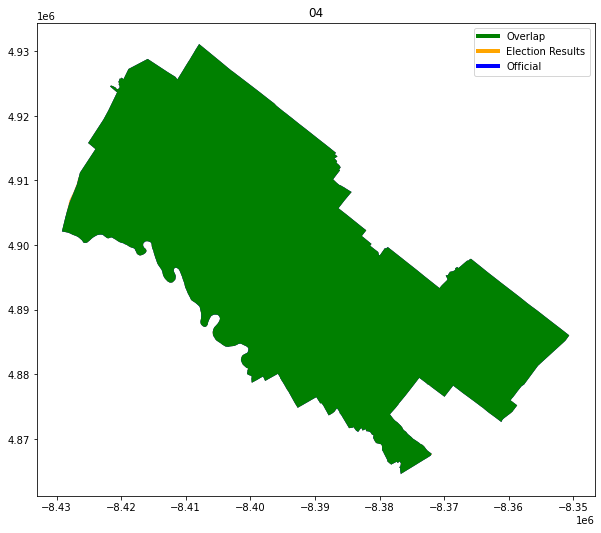

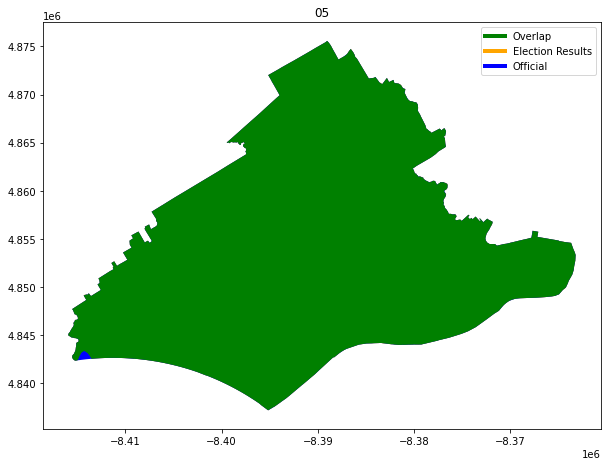

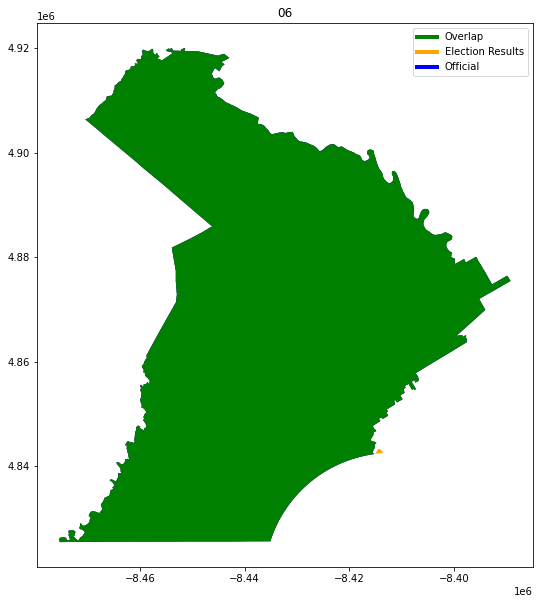

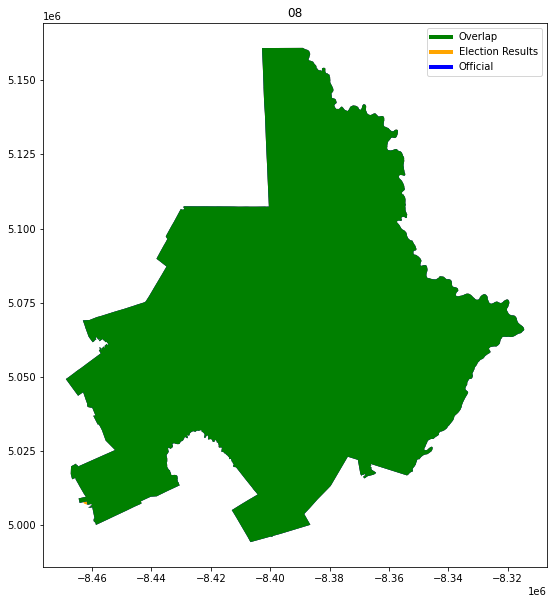

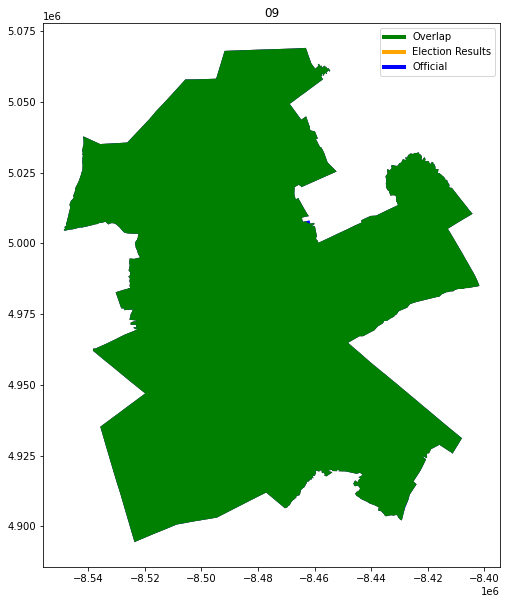

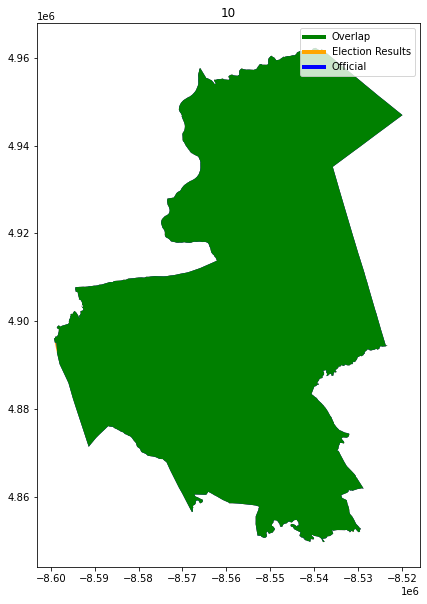

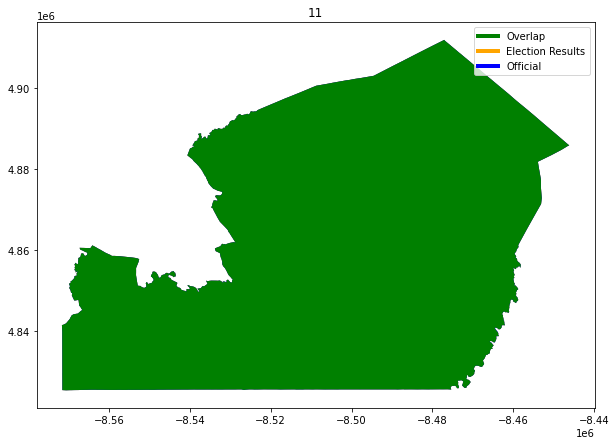

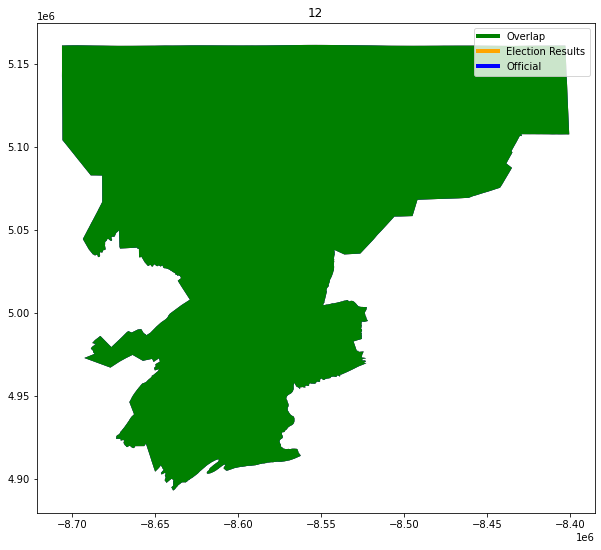

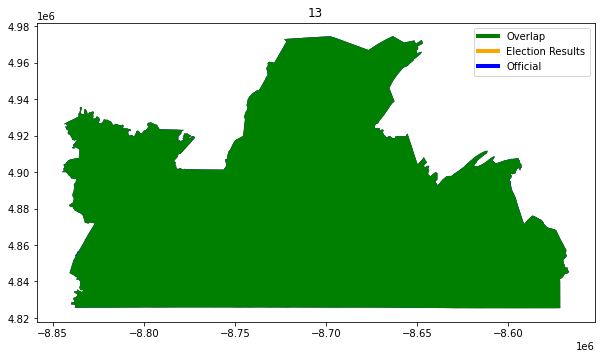

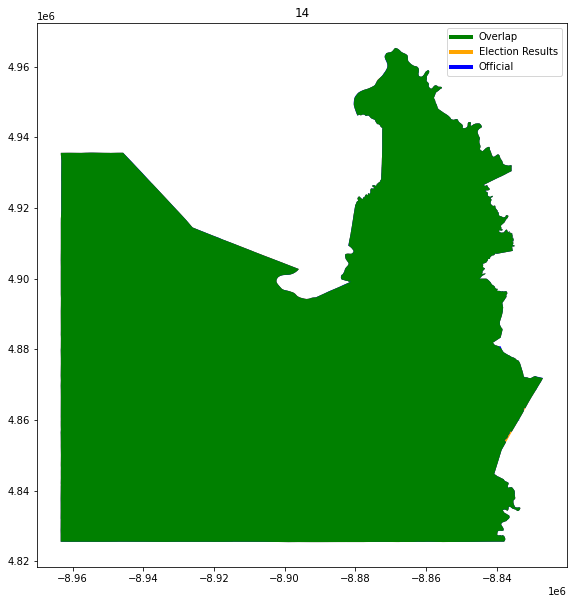

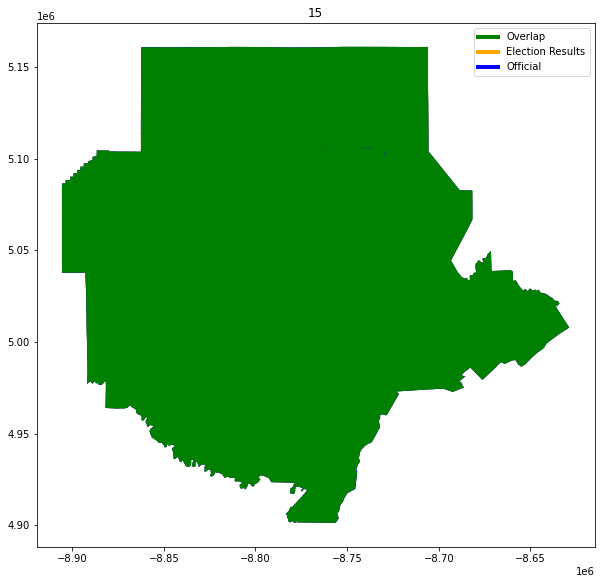

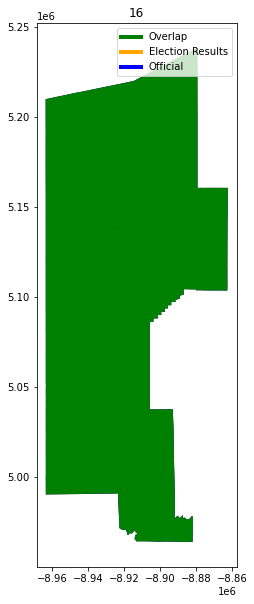

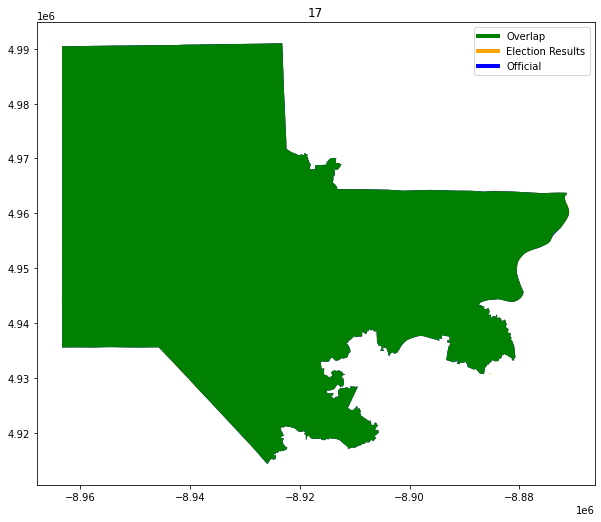

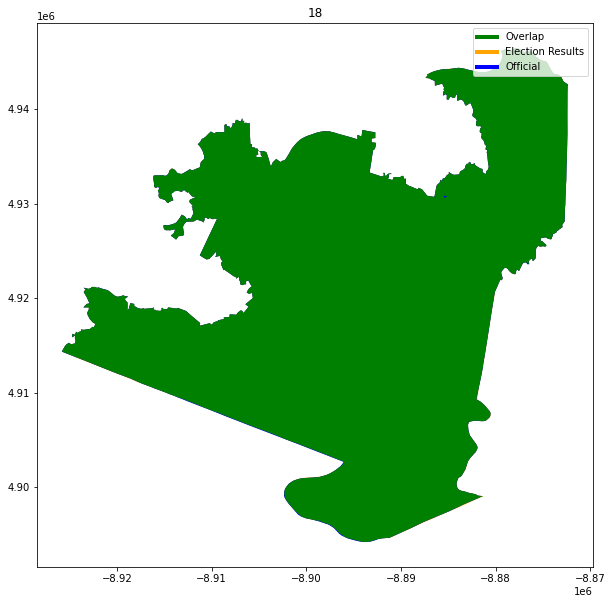

In [152]:
pdv.compare_geometries(dissolved_cong_results, pa_cong_districts ,"Election Results", "Official", "CONG_DIST", "districts", area_threshold=.1)


Checking 203 districts for differences of greater than 0.1 km^2

1) For 015 difference in area is 0.1302087411705496
2) For 035 difference in area is 0.1042061817324266
3) For 039 difference in area is 0.22393789181501997
4) For 044 difference in area is 0.10639804400363592
5) For 045 difference in area is 0.15970248376845614
6) For 046 difference in area is 0.37138486006644433
7) For 049 difference in area is 0.1338695027128594
8) For 052 difference in area is 0.5443072898116207
9) For 054 difference in area is 0.16728398508686512
10) For 055 difference in area is 1.0376048308270742
11) For 056 difference in area is 0.24376721614088803
12) For 057 difference in area is 0.7337936896990042
13) For 058 difference in area is 1.0797519956869324
14) For 059 difference in area is 1.7549629018866588
15) For 062 difference in area is 0.21685808126670186
16) For 067 difference in area is 0.1565261679926516
17) For 069 difference in area is 0.17156726548319393
18) For 071 difference in area is 0

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:661: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


22) For 079 difference in area is 0.34691315479945056
23) For 080 difference in area is 0.5543179606943179
24) For 084 difference in area is 6.157985277772535
25) For 085 difference in area is 6.157985245311214
26) For 087 difference in area is 0.10508654845755461
27) For 095 difference in area is 0.13952216708257142
28) For 119 difference in area is 0.15006923042042192
29) For 131 difference in area is 0.14078028793593808
30) For 136 difference in area is 0.35210402566676585
31) For 137 difference in area is 0.20942302194303392
32) For 138 difference in area is 0.24499716790056647
33) For 160 difference in area is 0.12412420591364422
34) For 183 difference in area is 0.14679512304533326
35) For 196 difference in area is 0.13869983999744878

Scroll down to see plots of any differences

Of the 203 districts:

2 districts w/ a difference of 0 km^2
166 districts w/ a difference between 0 and .1 km^2
25 districts w/ a difference between .1 and .5 km^2
4 districts w/ a difference between .5

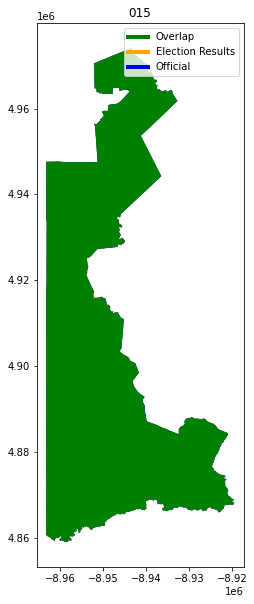

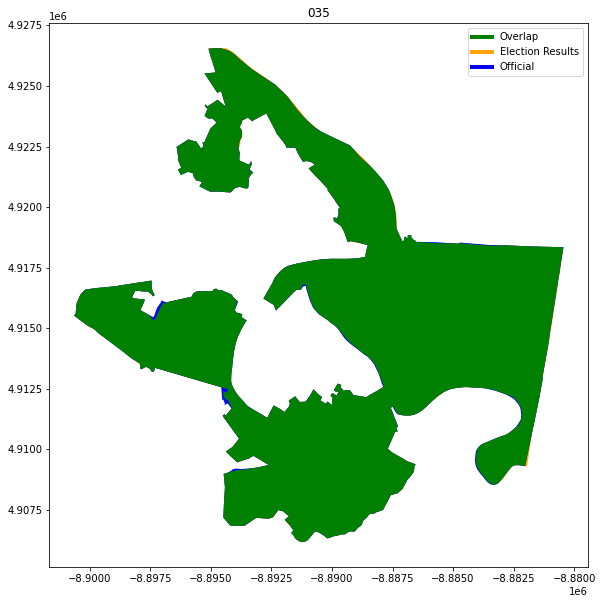

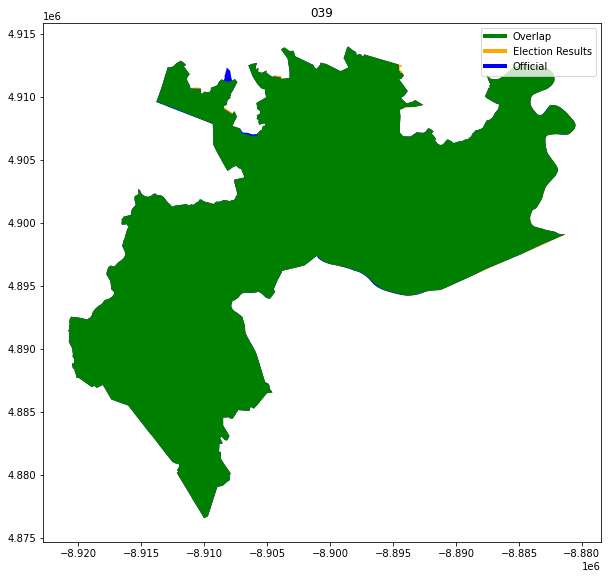

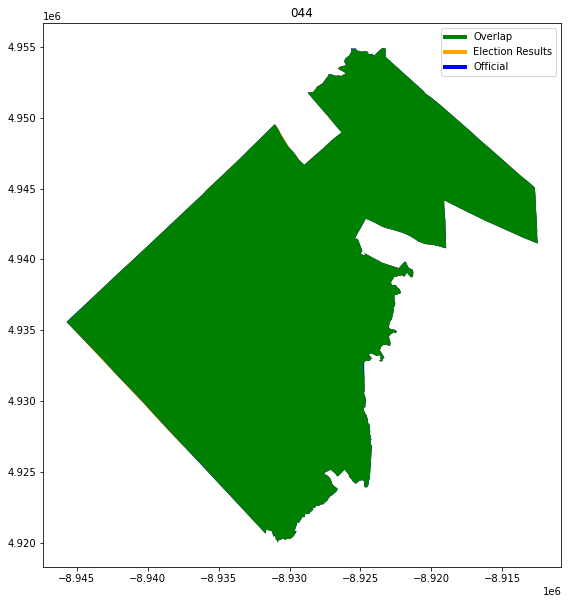

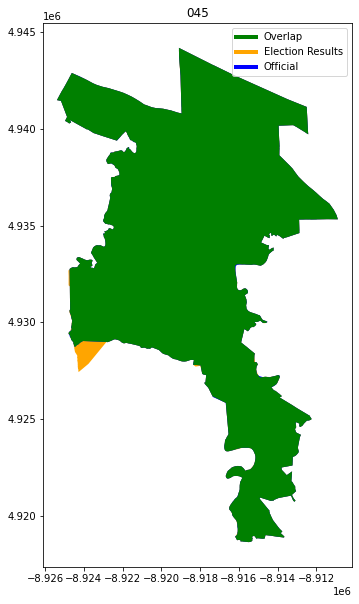

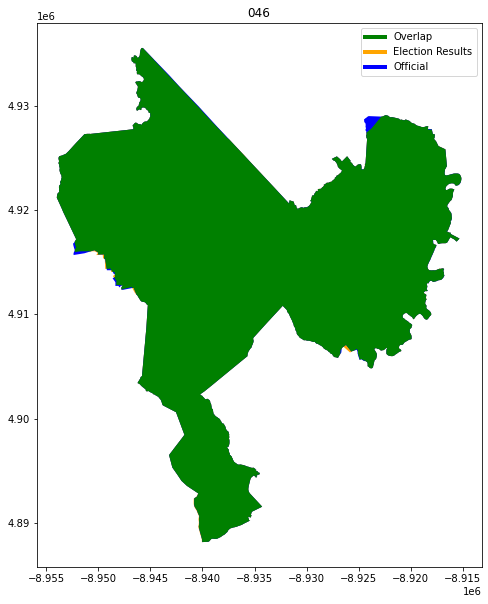

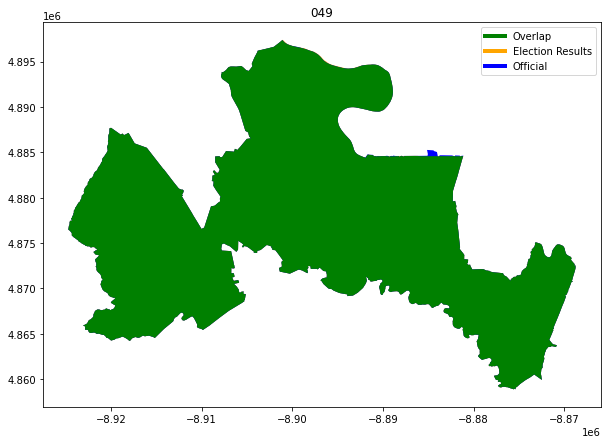

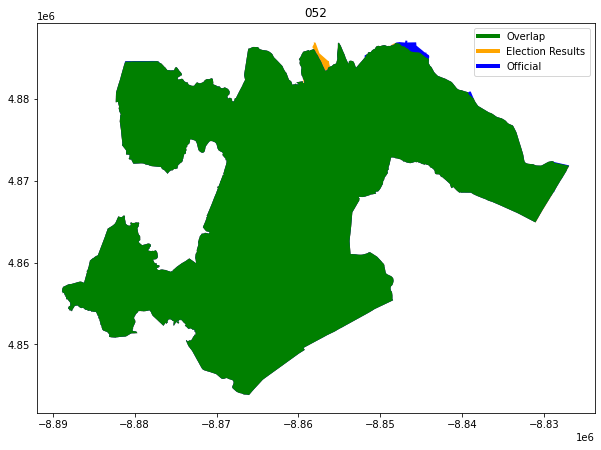

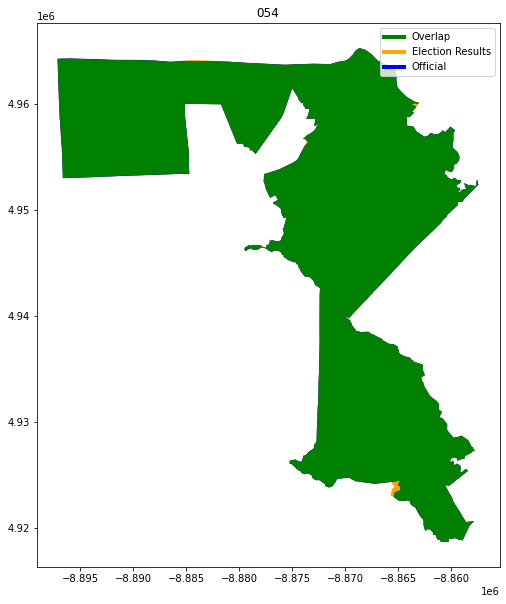

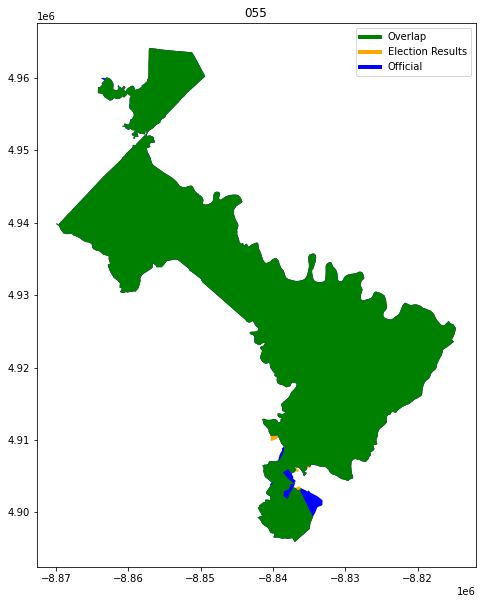

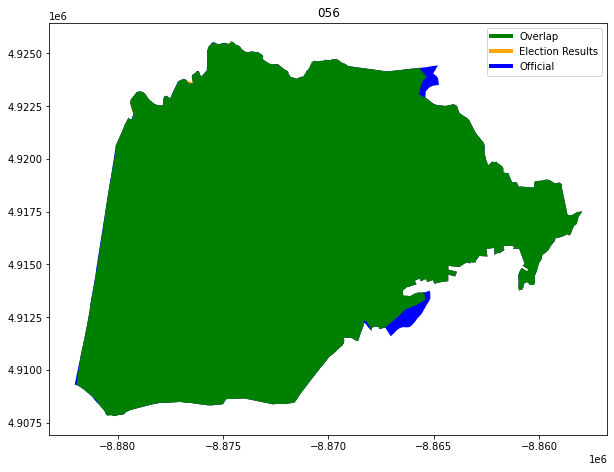

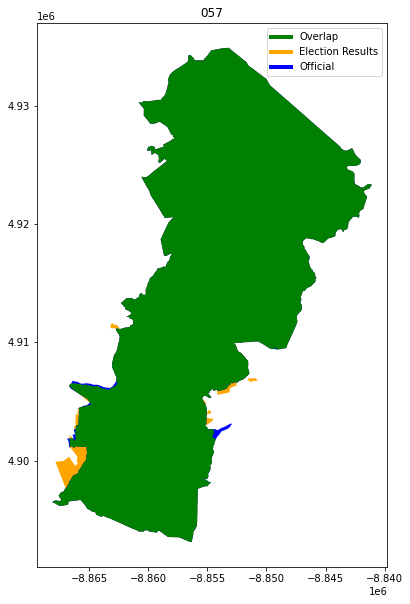

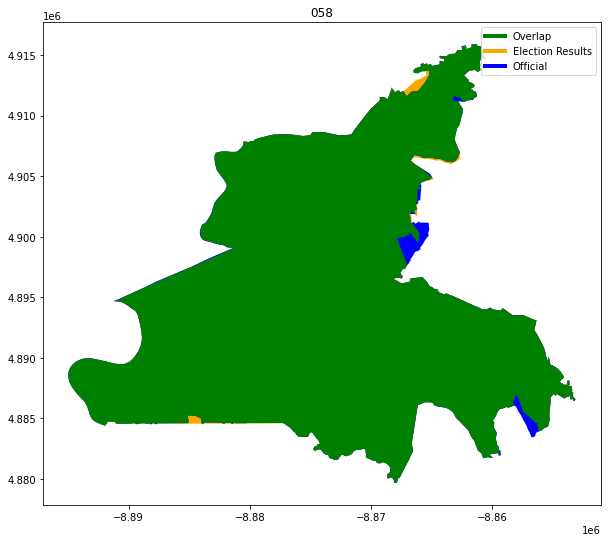

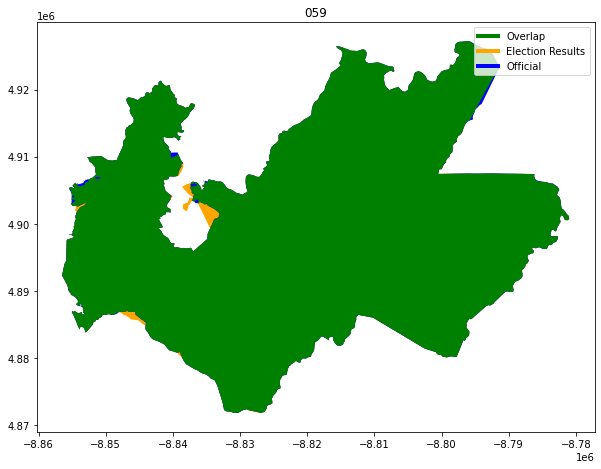

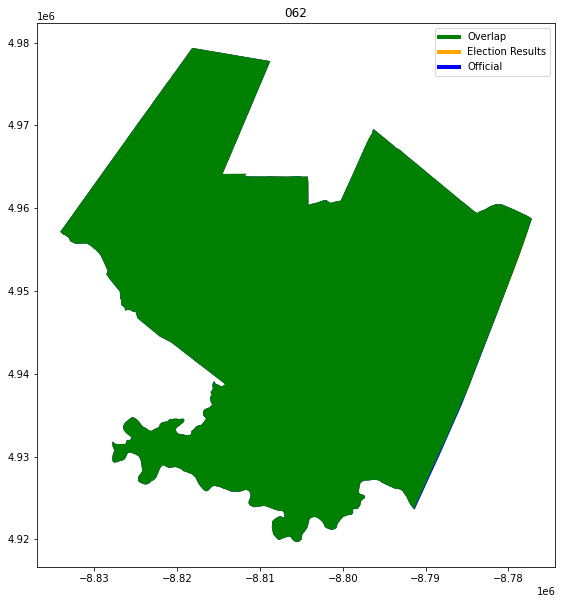

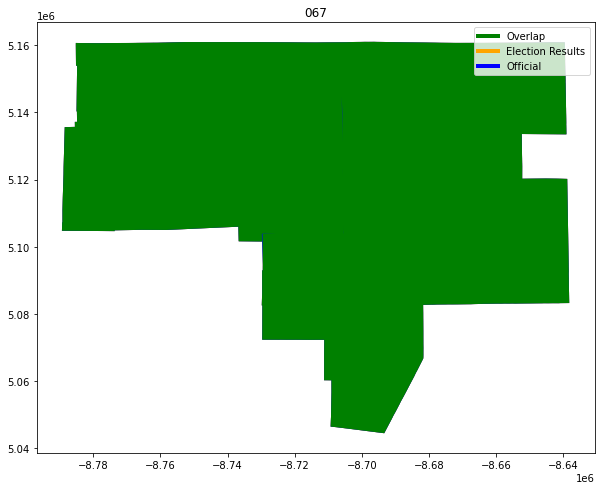

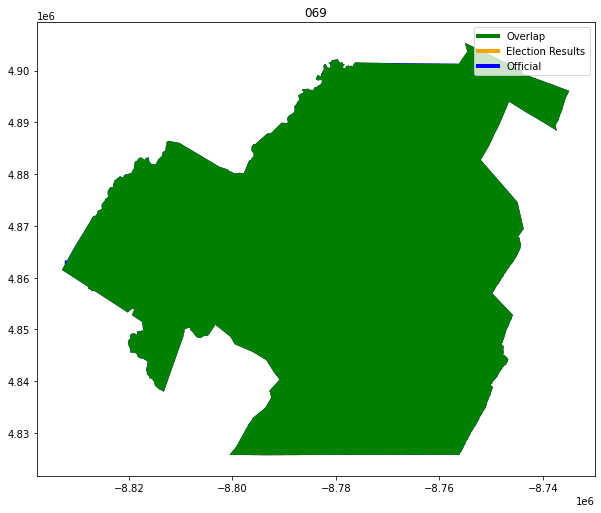

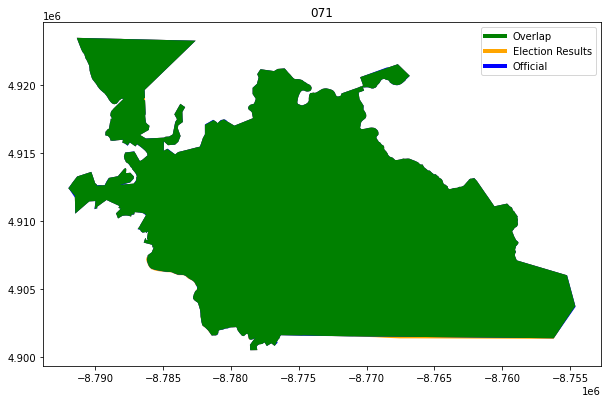

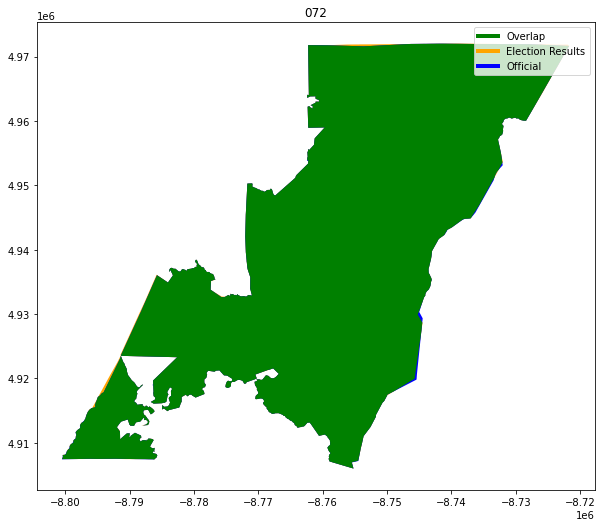

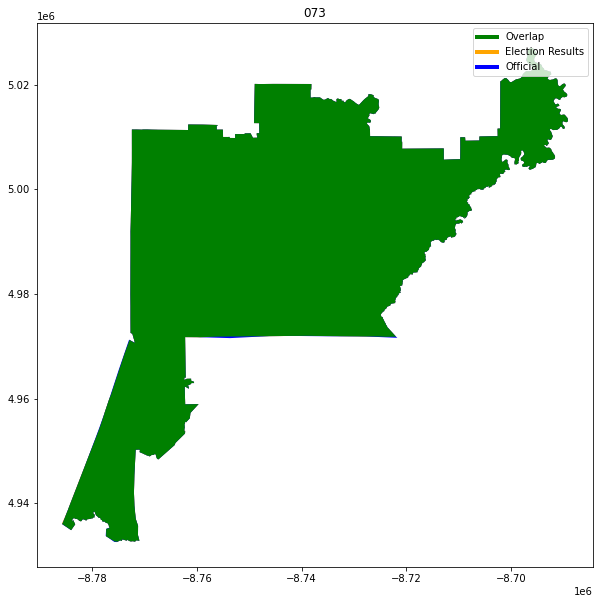

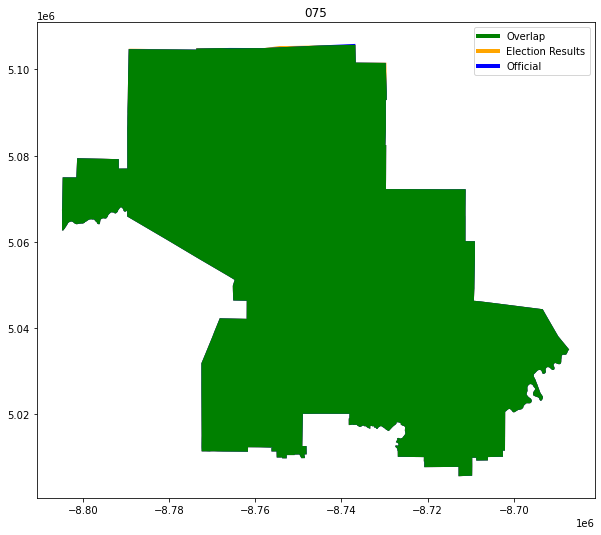

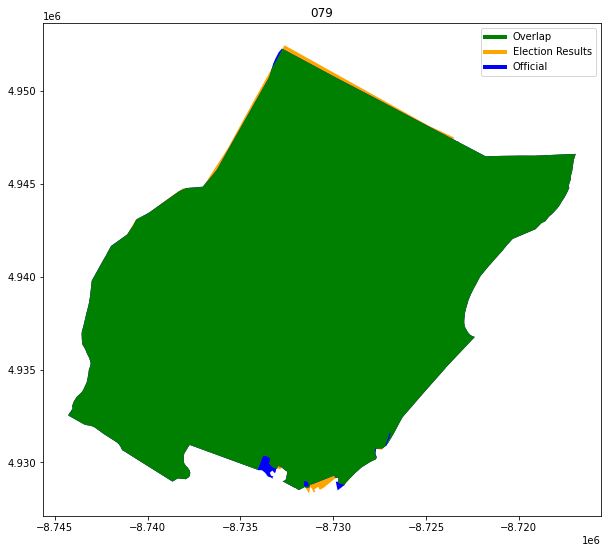

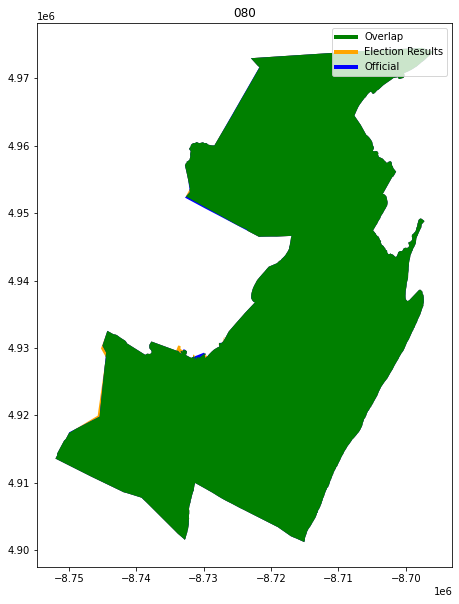

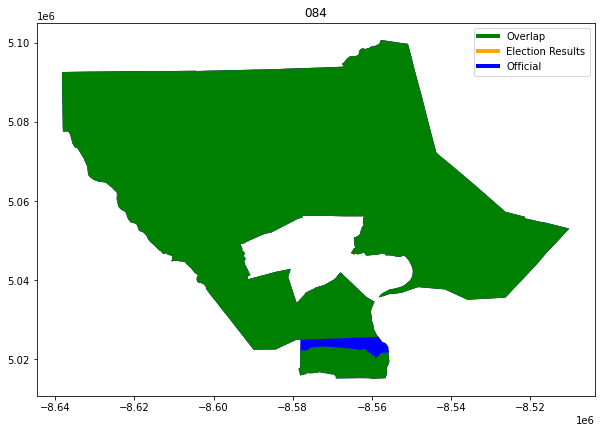

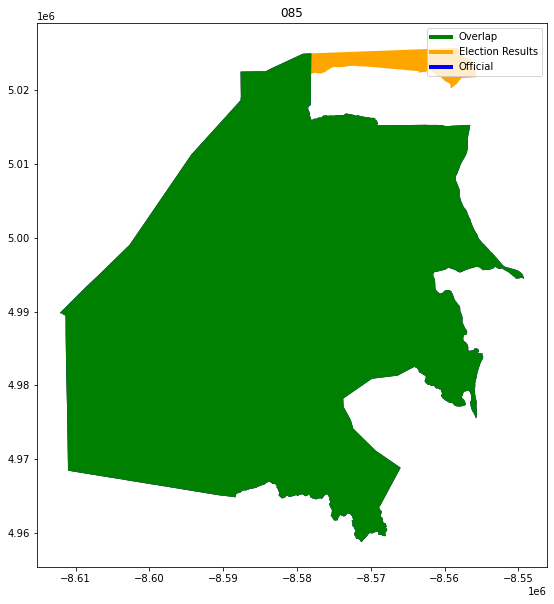

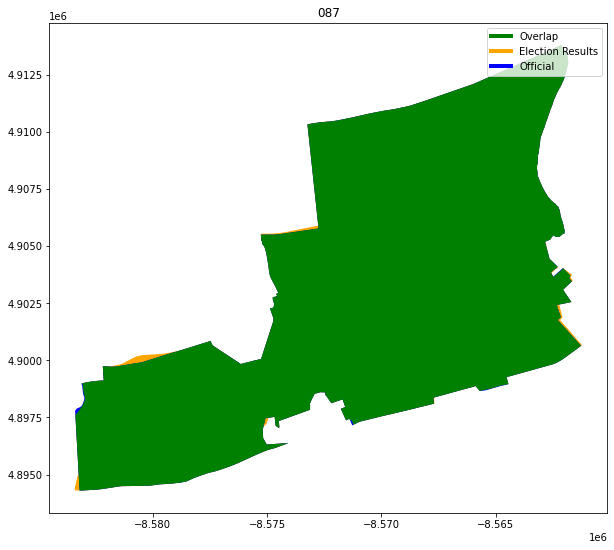

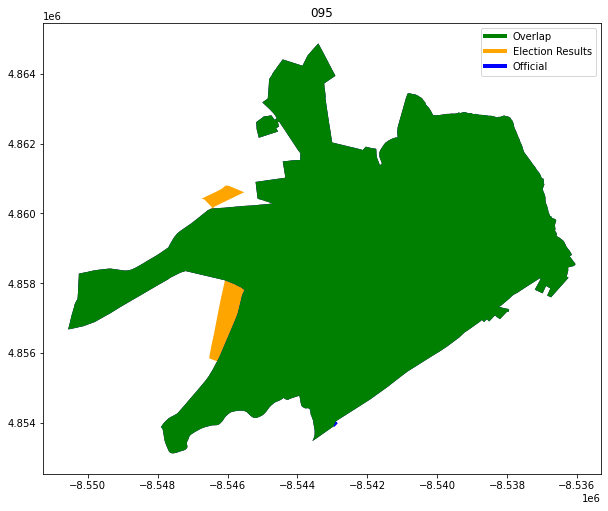

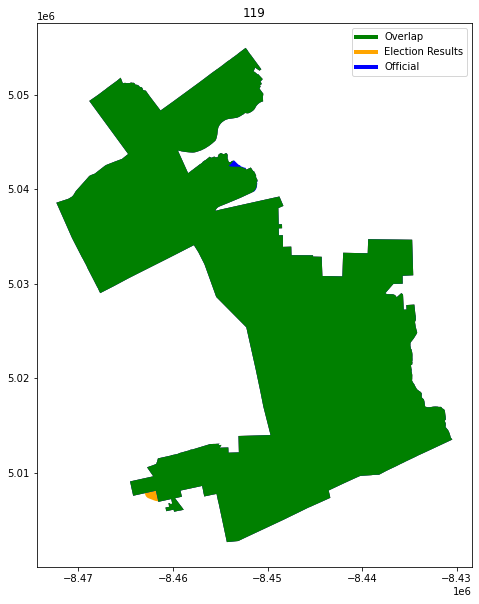

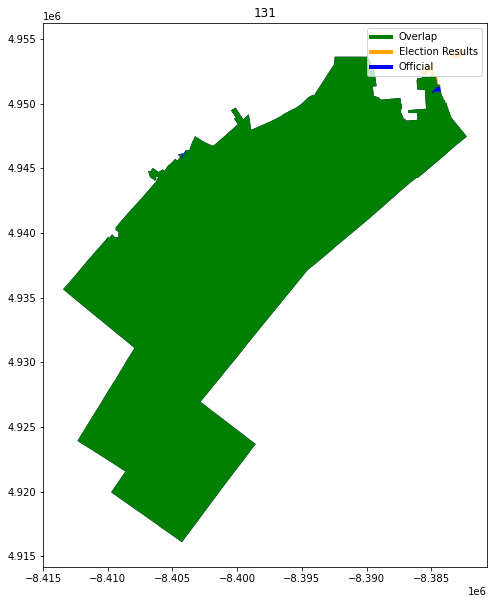

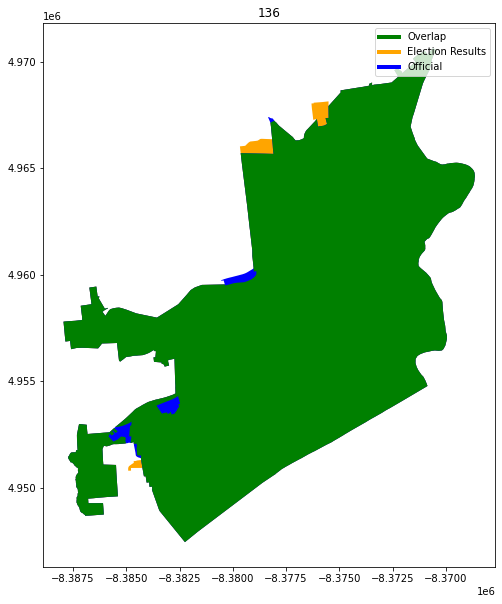

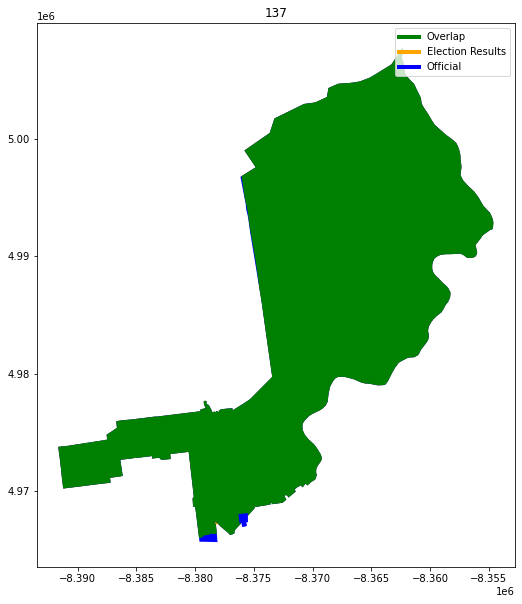

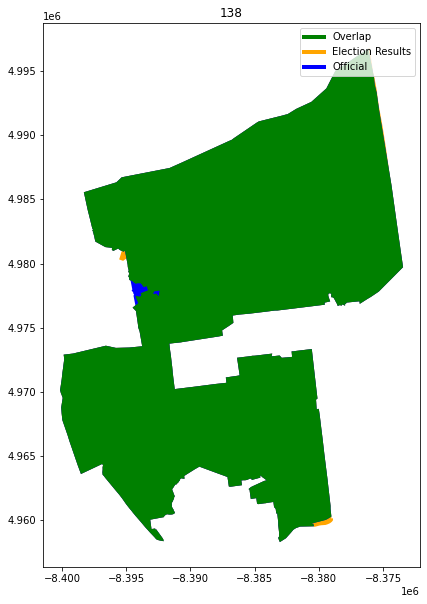

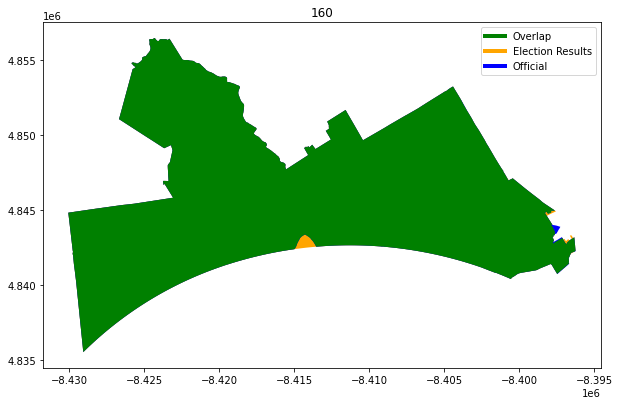

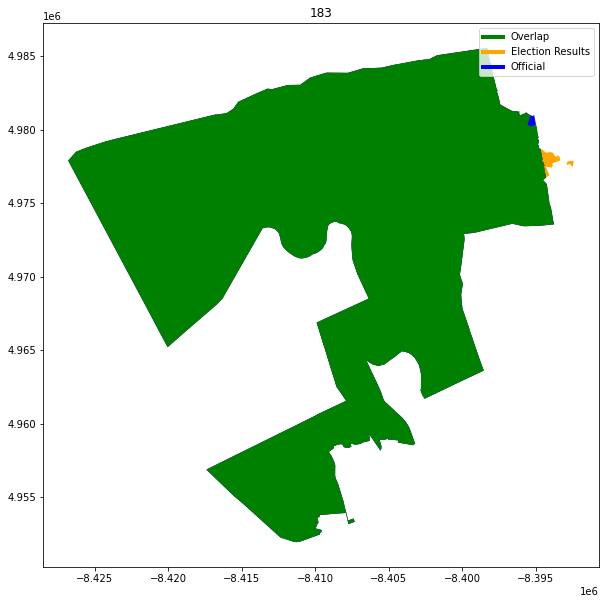

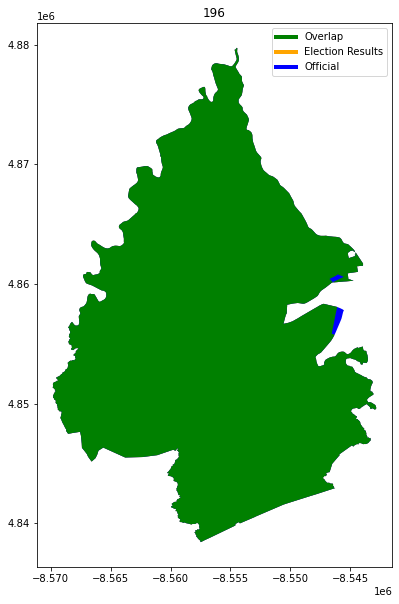

In [153]:
pdv.compare_geometries(dissolved_sldl_results, pa_sldl_districts ,"Election Results", "Official", "SLDL_DIST","districts", area_threshold=.1)


Checking 50 districts for differences of greater than 0.1 km^2

1) For 21 difference in area is 0.13042507179970686
2) For 25 difference in area is 0.23397135392043242
3) For 30 difference in area is 0.6543827803028891
4) For 31 difference in area is 0.21184158425338273
5) For 32 difference in area is 0.5039910927392398
6) For 35 difference in area is 1.0402822779456409
7) For 37 difference in area is 0.20090379894663893
8) For 38 difference in area is 0.18573643569151774
9) For 39 difference in area is 0.5639739358639919
10) For 41 difference in area is 0.35422241867887544
11) For 45 difference in area is 0.26443502512993056
12) For 46 difference in area is 0.20419749669097642

Scroll down to see plots of any differences

Of the 50 districts:

0 districts w/ a difference of 0 km^2
38 districts w/ a difference between 0 and .1 km^2
8 districts w/ a difference between .1 and .5 km^2
3 districts w/ a difference between .5 and 1 km^2
1 districts w/ a difference between 1 and 2 km^2
0 dist

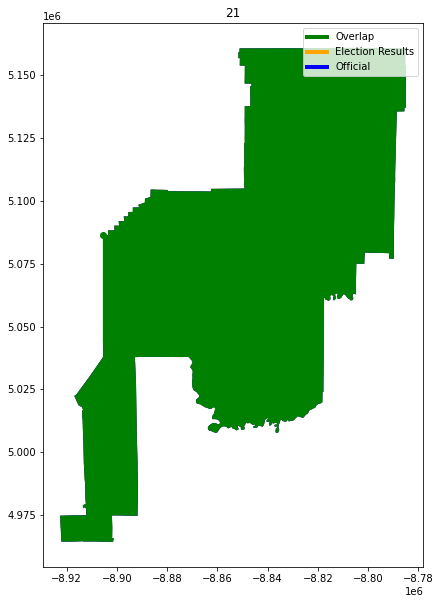

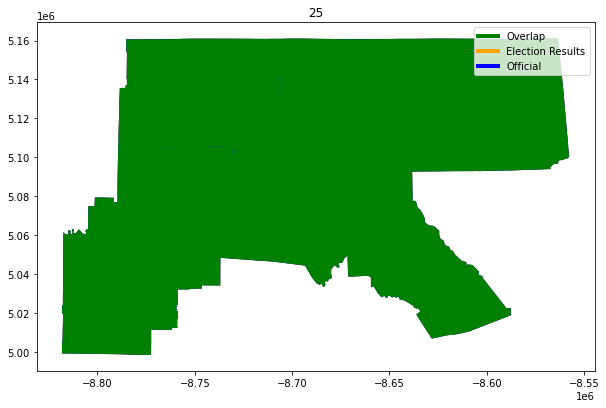

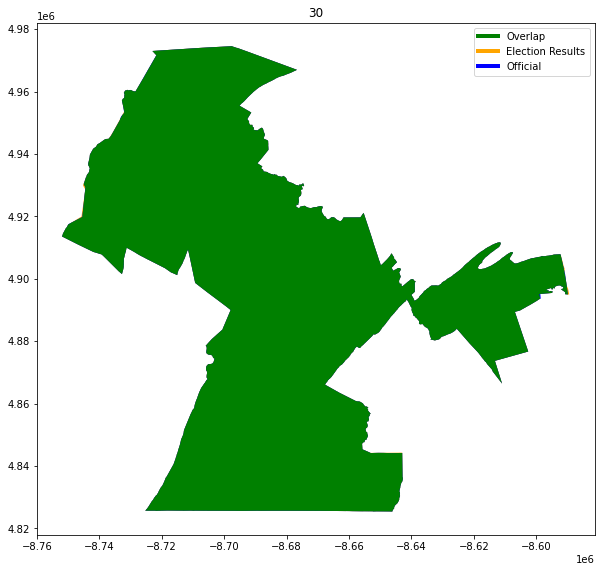

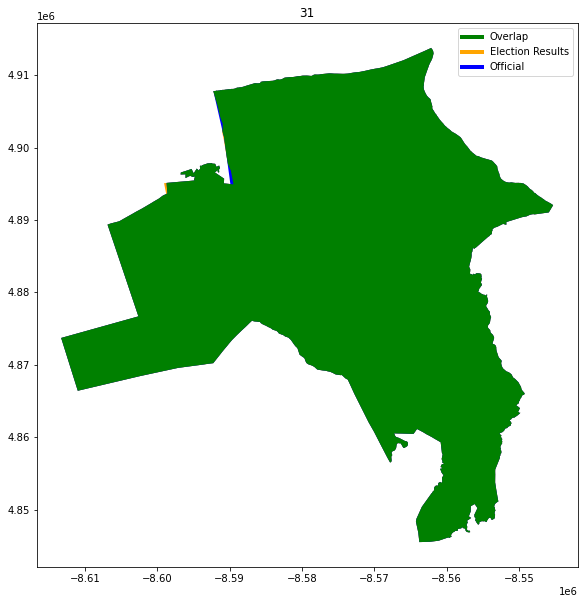

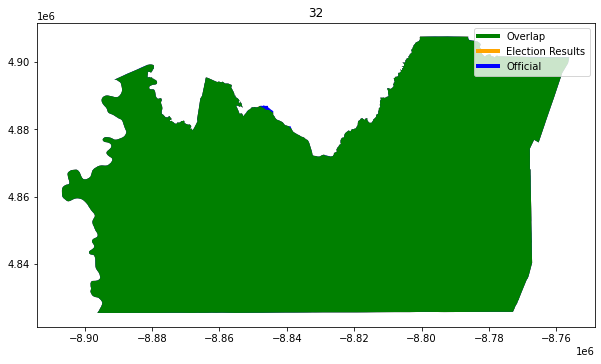

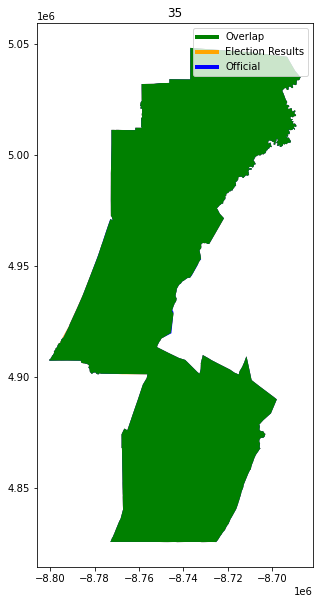

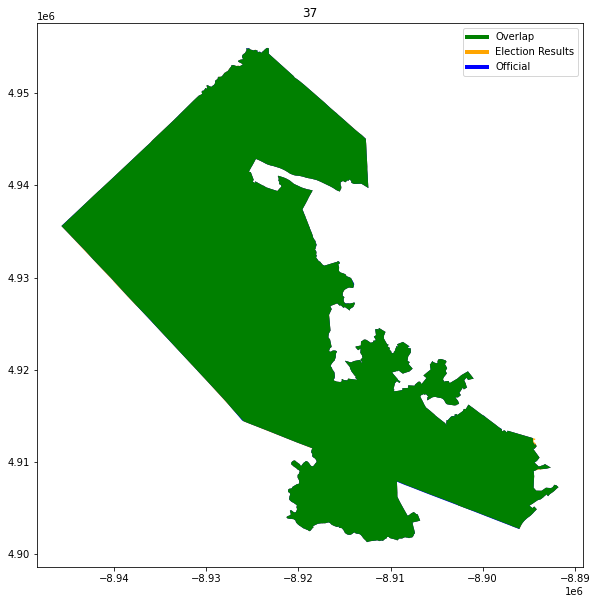

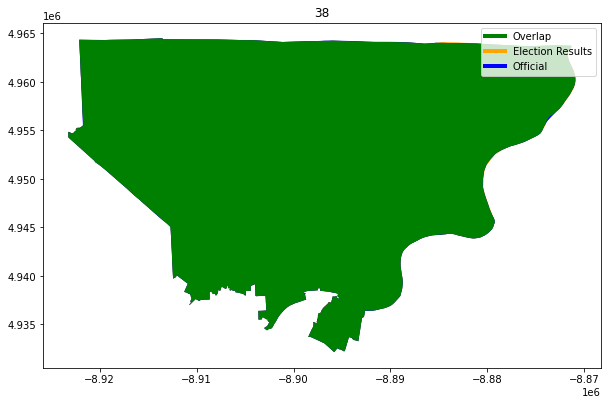

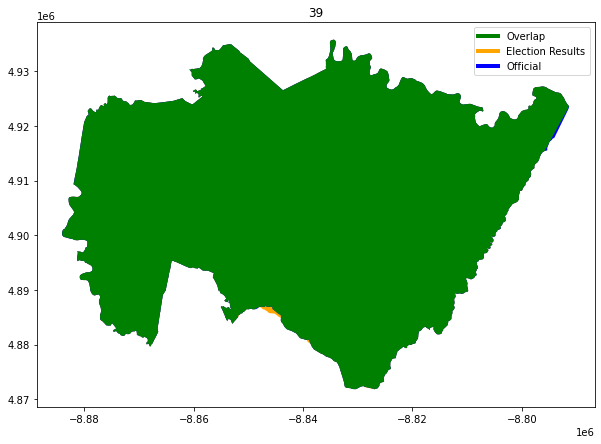

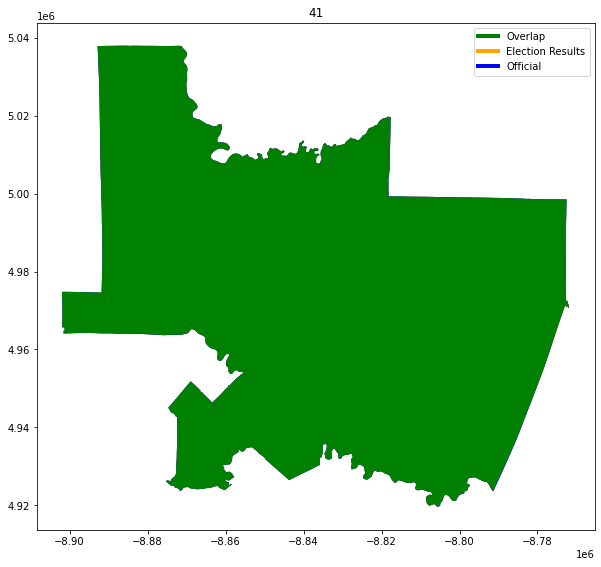

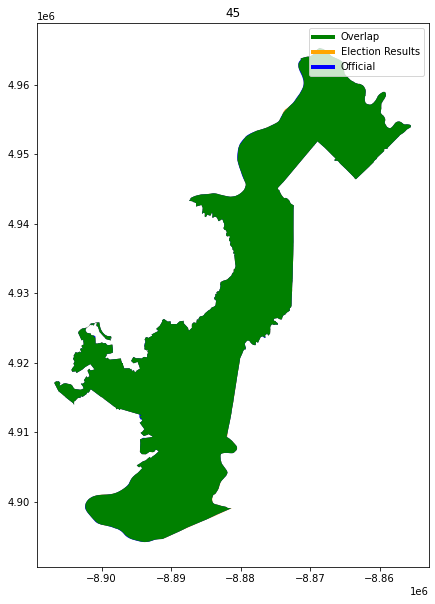

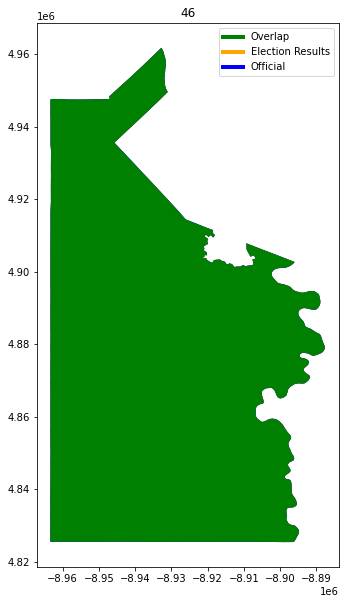

In [154]:
pdv.compare_geometries(dissolved_sldu_results, pa_sldu_districts ,"Election Results", "Official", "SLDU_DIST","districts", area_threshold=.1)


## Clean Typos

In [155]:
pa_20_sldl_prec.loc[pa_20_sldl_prec["UNIQUE_ID"].str.contains("081-:-LOYALSOCK PRECINCT 03"), "GSL083RWHE"] = 269
pa_20_sldl_prec.loc[pa_20_sldl_prec["UNIQUE_ID"].str.contains("081-:-OLD LYCOMING PRECINCT 01"), "GSL083RWHE"] = 1261
pa_20_sldl_prec.loc[pa_20_sldl_prec["UNIQUE_ID"].str.contains("081-:-SUSQUEHANNA"), "GSL083RWHE"] = 505
pa_20_sldl_prec.loc[pa_20_sldl_prec["UNIQUE_ID"].str.contains("081-:-WILLIAMSPORT WARD 02"),"GSL083RWHE"] = 261
pa_20_sldl_prec.loc[pa_20_sldl_prec["UNIQUE_ID"].str.contains("081-:-WILLIAMSPORT WARD 09"),"GSL083RWHE"] = 318

In [156]:
pa_20_sldl_prec.loc[pa_20_sldl_prec["UNIQUE_ID"].str.contains("081-:-GAMBLE"), "GSL084RHAM"] = 431
pa_20_sldl_prec.loc[pa_20_sldl_prec["UNIQUE_ID"].str.contains("081-:-JERSEY SHORE WARD 03"), "GSL084RHAM"] = 338
pa_20_sldl_prec.loc[pa_20_sldl_prec["UNIQUE_ID"].str.contains("081-:-MCINTYRE"), "GSL084RHAM"] = 185
pa_20_sldl_prec.loc[pa_20_sldl_prec["UNIQUE_ID"].str.contains("081-:-MONTOURSVILLE WARD 03"), "GSL084RHAM"] = 846
pa_20_sldl_prec.loc[pa_20_sldl_prec["UNIQUE_ID"].str.contains("081-:-PORTER"), "GSL084RHAM"] = 707

In [157]:
pa_20_sldu_prec.loc[pa_20_sldu_prec["UNIQUE_ID"].str.contains("081-:-CASCADE"), "GSU23RYAW"] = 223

In [158]:
pa_20_sldl_prec.loc[pa_20_sldl_prec["UNIQUE_ID"]==("111-:-PAINT"), "GSL071RRIG"] = 449
pa_20_sldl_prec.loc[pa_20_sldl_prec["UNIQUE_ID"]==("111-:-PAINT"), "GSL071OWRI"] = 21
pa_20_sldl_prec.loc[pa_20_sldl_prec["UNIQUE_ID"].str.contains("051-:-WHARTON"), "GSL051DJON"] = 440
pa_20_sldl_prec.loc[pa_20_sldl_prec["UNIQUE_ID"].str.contains("051-:-WHARTON"), "GSL051RDOW"] = 1260

In [159]:
pa_20_cong_prec.loc[pa_20_cong_prec["UNIQUE_ID"].str.contains("021-:-CONEMAUGH DISTRICT CENTER"), 'GCON13DROW'] = 162
pa_20_cong_prec.loc[pa_20_cong_prec["UNIQUE_ID"].str.contains("021-:-CONEMAUGH DISTRICT CENTER"), 'GCON13RJOY'] = 483

## Vote Total Checks

In [160]:
official_county_totals = pd.read_csv("./raw-from-source/cleaned_county_totals.csv")

In [161]:
official_county_totals["County Name"] = official_county_totals["County Name"].str.title()
official_county_totals["County Name"] = official_county_totals["County Name"].str.replace("Mckean", "McKean")
official_county_totals["COUNTYFP"] = official_county_totals["County Name"].map(fips_dict).fillna(official_county_totals["County Name"])
official_county_totals["COUNTYFP"] = official_county_totals["COUNTYFP"].astype(str).str.zfill(3)
official_county_totals= official_county_totals.fillna(0)


In [162]:
for col in official_county_totals.columns:
    if col != "County Name" and col != "COUNTYFP":
        official_county_totals[col] = official_county_totals[col].astype(str)
        official_county_totals[col] = official_county_totals[col].str.replace(",","")
        official_county_totals[col] = official_county_totals[col].fillna(0)
        official_county_totals[col] = official_county_totals[col].astype(float)
        official_county_totals[col] = official_county_totals[col].astype(int)

In [164]:
sldl_check_cols = [i for i in list(official_county_totals.columns) if "GSL" in i]
sldu_check_cols = [i for i in list(official_county_totals.columns) if "GSU" in i]
cong_check_cols = [i for i in list(official_county_totals.columns) if "GCON" in i]
st_check_cols = [i for i in list(official_county_totals.columns) if i not in sldl_check_cols and i not in sldu_check_cols and i not in cong_check_cols and i != "County Name" and i != "COUNTYFP"]

sldl_check_cols.sort()
sldu_check_cols.sort()
cong_check_cols.sort()
st_check_cols.sort()

In [165]:
pdv.statewide_totals_check(official_county_totals, "Official", pa_20_st_prec, "ERJ", st_check_cols)

***Statewide Totals Check***
G20ATGDSHA has a difference of 3841 votes
	Official: 3461472 votes
	ERJ: 3457631 votes
G20ATGGWEI has a difference of 167 votes
	Official: 70804 votes
	ERJ: 70637 votes
G20ATGLWAS has a difference of 322 votes
	Official: 120489 votes
	ERJ: 120167 votes
G20ATGRHEI has a difference of 3737 votes
	Official: 3153831 votes
	ERJ: 3150094 votes
G20AUDDAHM has a difference of 3487 votes
	Official: 3129131 votes
	ERJ: 3125644 votes
G20AUDGFAI has a difference of 195 votes
	Official: 78588 votes
	ERJ: 78393 votes
G20AUDLMOO has a difference of 401 votes
	Official: 205929 votes
	ERJ: 205528 votes
G20AUDRDEF has a difference of 3942 votes
	Official: 3338009 votes
	ERJ: 3334067 votes
G20PREDBID has a difference of -2081 votes
	Official: 3458229 votes
	ERJ: 3460310 votes
G20PRELJOR has a difference of -42 votes
	Official: 79380 votes
	ERJ: 79422 votes
G20PRERTRU has a difference of -422 votes
	Official: 3377674 votes
	ERJ: 3378096 votes
G20TREDTOR has a difference of 351

In [166]:
pdv.statewide_totals_check(official_county_totals, "Official", pa_20_sldu_prec, "ERJ", sldu_check_cols)


***Statewide Totals Check***
GSU01DSAV is equal 	 both dataframes 124514
GSU03DSTR is equal 	 both dataframes 90323
GSU05DSAB is equal 	 both dataframes 69514
GSU07DHUG has a difference of 53 votes
	Official: 115760 votes
	ERJ: 115707 votes
GSU09DKAN has a difference of 48 votes
	Official: 80198 votes
	ERJ: 80150 votes
GSU09RKIL has a difference of 59 votes
	Official: 74173 votes
	ERJ: 74114 votes
GSU11DSCH is equal 	 both dataframes 66735
GSU11RBAK is equal 	 both dataframes 47624
GSU13DDIA has a difference of 105 votes
	Official: 58524 votes
	ERJ: 58419 votes
GSU13RMAR has a difference of 167 votes
	Official: 73371 votes
	ERJ: 73204 votes
GSU15DSCO has a difference of 187 votes
	Official: 66632 votes
	ERJ: 66445 votes
GSU15RDIS has a difference of 162 votes
	Official: 71119 votes
	ERJ: 70957 votes
GSU17DCAP has a difference of 121 votes
	Official: 105840 votes
	ERJ: 105719 votes
GSU17RFIS has a difference of 75 votes
	Official: 54750 votes
	ERJ: 54675 votes
GSU19DCOM has a difference

In [167]:
pdv.statewide_totals_check(official_county_totals, "Official", pa_20_cong_prec, "ERJ", cong_check_cols)


***Statewide Totals Check***
GCON01DFIN is equal 	 both dataframes 191875
GCON01RFIT is equal 	 both dataframes 249804
GCON02DBOY has a difference of -128 votes
	Official: 198140 votes
	ERJ: 198268 votes
GCON02RTOR has a difference of -61 votes
	Official: 75022 votes
	ERJ: 75083 votes
GCON03DEVA has a difference of -214 votes
	Official: 341708 votes
	ERJ: 341922 votes
GCON03RHAR has a difference of -57 votes
	Official: 33671 votes
	ERJ: 33728 votes
GCON04DDEA has a difference of -8 votes
	Official: 264637 votes
	ERJ: 264645 votes
GCON04RBAR has a difference of -8 votes
	Official: 179926 votes
	ERJ: 179934 votes
GCON05DSCA has a difference of -278 votes
	Official: 255743 votes
	ERJ: 256021 votes
GCON05RPRU has a difference of -134 votes
	Official: 139552 votes
	ERJ: 139686 votes
GCON06DHOU has a difference of -105 votes
	Official: 226440 votes
	ERJ: 226545 votes
GCON06REMM has a difference of -72 votes
	Official: 177526 votes
	ERJ: 177598 votes
GCON07DWIL has a difference of -194 votes


In [168]:
pdv.statewide_totals_check(official_county_totals, "Official", pa_20_sldl_prec, "ERJ", sldl_check_cols)

***Statewide Totals Check***
GSL001DHAR has a difference of 22 votes
	Official: 17919 votes
	ERJ: 17897 votes
GSL002DMER has a difference of 20 votes
	Official: 22342 votes
	ERJ: 22322 votes
GSL003DBIZ has a difference of 21 votes
	Official: 22219 votes
	ERJ: 22198 votes
GSL003RHAY has a difference of 18 votes
	Official: 13985 votes
	ERJ: 13967 votes
GSL004RSON has a difference of 16 votes
	Official: 26762 votes
	ERJ: 26746 votes
GSL005DGON is equal 	 both dataframes 10112
GSL005RJOZ is equal 	 both dataframes 23291
GSL006DFER has a difference of 4 votes
	Official: 11286 votes
	ERJ: 11282 votes
GSL006RROA has a difference of 7 votes
	Official: 21285 votes
	ERJ: 21278 votes
GSL007DLON has a difference of 15 votes
	Official: 28297 votes
	ERJ: 28282 votes
GSL008DHEA has a difference of 10 votes
	Official: 7883 votes
	ERJ: 7873 votes
GSL008RBON has a difference of 14 votes
	Official: 23838 votes
	ERJ: 23824 votes
GSL009DSAI has a difference of 3 votes
	Official: 15180 votes
	ERJ: 15177 vot

In [169]:
pdv.county_totals_check(official_county_totals, "Official", pa_20_st_prec, "ERJ", st_check_cols,"COUNTYFP",full_print=False)


***Countywide Totals Check***

G20ATGDSHA contains differences in these counties:
	003 has a difference of 357 votes
		Official: 443523 votes
		ERJ: 443166 votes
	005 has a difference of 11 votes
		Official: 10673 votes
		ERJ: 10662 votes
	007 has a difference of 16 votes
		Official: 43446 votes
		ERJ: 43430 votes
	009 has a difference of 3 votes
		Official: 4743 votes
		ERJ: 4740 votes
	013 has a difference of 15 votes
		Official: 17511 votes
		ERJ: 17496 votes
	017 has a difference of 342 votes
		Official: 200335 votes
		ERJ: 199993 votes
	019 has a difference of 74 votes
		Official: 40708 votes
		ERJ: 40634 votes
	021 has a difference of 17 votes
		Official: 25441 votes
		ERJ: 25424 votes
	025 has a difference of 33 votes
		Official: 12267 votes
		ERJ: 12234 votes
	027 has a difference of 72 votes
		Official: 38198 votes
		ERJ: 38126 votes
	029 has a difference of 280 votes
		Official: 169452 votes
		ERJ: 169172 votes
	031 has a difference of 4 votes
		Official: 5561 votes
		ERJ: 55

		Official: 5414 votes
		ERJ: 5402 votes
	073 has a difference of 1 votes
		Official: 776 votes
		ERJ: 775 votes
	079 has a difference of 8 votes
		Official: 2533 votes
		ERJ: 2525 votes
	081 has a difference of 3 votes
		Official: 1181 votes
		ERJ: 1178 votes
	083 has a difference of 1 votes
		Official: 365 votes
		ERJ: 364 votes
	085 has a difference of 2 votes
		Official: 1058 votes
		ERJ: 1056 votes
	087 has a difference of 1 votes
		Official: 344 votes
		ERJ: 343 votes
	089 has a difference of 14 votes
		Official: 1654 votes
		ERJ: 1640 votes
	091 has a difference of 28 votes
		Official: 8397 votes
		ERJ: 8369 votes
	093 has a difference of 1 votes
		Official: 222 votes
		ERJ: 221 votes
	095 has a difference of 16 votes
		Official: 3004 votes
		ERJ: 2988 votes
	099 has a difference of 2 votes
		Official: 509 votes
		ERJ: 507 votes
	107 has a difference of 9 votes
		Official: 1491 votes
		ERJ: 1482 votes
	109 has a difference of 3 votes
		Official: 321 votes
		ERJ: 318 votes
	115 h

		ERJ: 62388 votes
	081 has a difference of 35 votes
		Official: 15618 votes
		ERJ: 15583 votes
	083 has a difference of 4 votes
		Official: 4360 votes
		ERJ: 4356 votes
	085 has a difference of 7 votes
		Official: 19090 votes
		ERJ: 19083 votes
	087 has a difference of 2 votes
		Official: 4036 votes
		ERJ: 4034 votes
	089 has a difference of 167 votes
		Official: 40257 votes
		ERJ: 40090 votes
	091 has a difference of 473 votes
		Official: 284952 votes
		ERJ: 284479 votes
	093 has a difference of 2 votes
		Official: 3375 votes
		ERJ: 3373 votes
	095 has a difference of 220 votes
		Official: 76792 votes
		ERJ: 76572 votes
	099 has a difference of 8 votes
		Official: 5073 votes
		ERJ: 5065 votes
	105 has a difference of 4 votes
		Official: 1441 votes
		ERJ: 1437 votes
	107 has a difference of 45 votes
		Official: 19894 votes
		ERJ: 19849 votes
	109 has a difference of 6 votes
		Official: 4226 votes
		ERJ: 4220 votes
	111 has a difference of 6 votes
		Official: 7783 votes
		ERJ: 7777 vot

		Official: 44847 votes
		ERJ: 44824 votes
	017 has a difference of 272 votes
		Official: 193628 votes
		ERJ: 193356 votes
	019 has a difference of 128 votes
		Official: 72957 votes
		ERJ: 72829 votes
	021 has a difference of 7 votes
		Official: 45886 votes
		ERJ: 45879 votes
	025 has a difference of 35 votes
		Official: 20785 votes
		ERJ: 20750 votes
	027 has a difference of 51 votes
		Official: 37846 votes
		ERJ: 37795 votes
	029 has a difference of 285 votes
		Official: 141525 votes
		ERJ: 141240 votes
	031 has a difference of 10 votes
		Official: 14136 votes
		ERJ: 14126 votes
	033 has a difference of 7 votes
		Official: 28243 votes
		ERJ: 28236 votes
	035 has a difference of 17 votes
		Official: 11491 votes
		ERJ: 11474 votes
	037 has a difference of 19 votes
		Official: 19163 votes
		ERJ: 19144 votes
	039 has a difference of 9 votes
		Official: 27670 votes
		ERJ: 27661 votes
	041 has a difference of 124 votes
		Official: 80146 votes
		ERJ: 80022 votes
	043 has a difference of 210

		Official: 55652 votes
		ERJ: 55547 votes
	043 has a difference of 212 votes
		Official: 72586 votes
		ERJ: 72374 votes
	047 has a difference of 2 votes
		Official: 4730 votes
		ERJ: 4728 votes
	049 has a difference of 46 votes
		Official: 64440 votes
		ERJ: 64394 votes
	051 has a difference of 26 votes
		Official: 21537 votes
		ERJ: 21511 votes
	053 has a difference of 6 votes
		Official: 699 votes
		ERJ: 693 votes
	055 has a difference of 36 votes
		Official: 20123 votes
		ERJ: 20087 votes
	057 has a difference of 4 votes
		Official: 1044 votes
		ERJ: 1040 votes
	059 has a difference of 1 votes
		Official: 5415 votes
		ERJ: 5414 votes
	061 has a difference of 8 votes
		Official: 5169 votes
		ERJ: 5161 votes
	063 has a difference of 7 votes
		Official: 12850 votes
		ERJ: 12843 votes
	065 has a difference of 3 votes
		Official: 4555 votes
		ERJ: 4552 votes
	067 has a difference of 4 votes
		Official: 2236 votes
		ERJ: 2232 votes
	069 has a difference of 89 votes
		Official: 61104 vote

		Official: 80 votes
		ERJ: 79 votes
	115 has a difference of 16 votes
		Official: 484 votes
		ERJ: 468 votes
	117 has a difference of 1 votes
		Official: 574 votes
		ERJ: 573 votes
	119 has a difference of 2 votes
		Official: 393 votes
		ERJ: 391 votes
	125 has a difference of 5 votes
		Official: 2827 votes
		ERJ: 2822 votes
	129 has a difference of 23 votes
		Official: 4358 votes
		ERJ: 4335 votes
	131 has a difference of 2 votes
		Official: 324 votes
		ERJ: 322 votes
	133 has a difference of 18 votes
		Official: 5999 votes
		ERJ: 5981 votes
G20TRERGAR contains differences in these counties:
	003 has a difference of 285 votes
		Official: 270964 votes
		ERJ: 270679 votes
	005 has a difference of 11 votes
		Official: 25875 votes
		ERJ: 25864 votes
	007 has a difference of 21 votes
		Official: 51292 votes
		ERJ: 51271 votes
	009 has a difference of 4 votes
		Official: 22272 votes
		ERJ: 22268 votes
	013 has a difference of 20 votes
		Official: 44464 votes
		ERJ: 44444 votes
	017 has a d

In [170]:
pdv.county_totals_check(official_county_totals, "Official", pa_20_sldu_prec, "ERJ", sldu_check_cols,"COUNTYFP",full_print=False)


***Countywide Totals Check***

GSU01DSAV is equal across all counties
GSU03DSTR is equal across all counties
GSU05DSAB is equal across all counties
GSU07DHUG contains differences in these counties:
	091 has a difference of 53 votes
		Official: 28712 votes
		ERJ: 28659 votes
GSU09DKAN contains differences in these counties:
	029 has a difference of 48 votes
		Official: 29509 votes
		ERJ: 29461 votes
GSU09RKIL contains differences in these counties:
	029 has a difference of 59 votes
		Official: 28988 votes
		ERJ: 28929 votes
GSU11DSCH is equal across all counties
GSU11RBAK is equal across all counties
GSU13DDIA contains differences in these counties:
	071 has a difference of 105 votes
		Official: 58524 votes
		ERJ: 58419 votes
GSU13RMAR contains differences in these counties:
	071 has a difference of 167 votes
		Official: 73371 votes
		ERJ: 73204 votes
GSU15DSCO contains differences in these counties:
	043 has a difference of 177 votes
		Official: 60547 votes
		ERJ: 60370 votes
	099 has 

GSU45DBRE contains differences in these counties:
	003 has a difference of 33 votes
		Official: 57815 votes
		ERJ: 57782 votes
	129 has a difference of 30 votes
		Official: 8446 votes
		ERJ: 8416 votes
GSU45RZIC contains differences in these counties:
	003 has a difference of 27 votes
		Official: 51588 votes
		ERJ: 51561 votes
	129 has a difference of 40 votes
		Official: 14604 votes
		ERJ: 14564 votes
GSU47DKRI contains differences in these counties:
	007 has a difference of 9 votes
		Official: 27206 votes
		ERJ: 27197 votes
	019 has a difference of 6 votes
		Official: 2966 votes
		ERJ: 2960 votes
	073 has a difference of 5 votes
		Official: 14423 votes
		ERJ: 14418 votes
GSU47RVOG contains differences in these counties:
	007 has a difference of 20 votes
		Official: 50443 votes
		ERJ: 50423 votes
	019 has a difference of 16 votes
		Official: 7284 votes
		ERJ: 7268 votes
	073 has a difference of 8 votes
		Official: 30692 votes
		ERJ: 30684 votes
GSU49DSLO contains differences in these 

In [171]:
pdv.county_totals_check(official_county_totals, "Official", pa_20_cong_prec, "ERJ", cong_check_cols,"COUNTYFP",full_print=False)


***Countywide Totals Check***

GCON01DFIN is equal across all counties
GCON01RFIT is equal across all counties
GCON02DBOY contains differences in these counties:
	101 has a difference of -128 votes
		Official: 198140 votes
		ERJ: 198268 votes
GCON02RTOR contains differences in these counties:
	101 has a difference of -61 votes
		Official: 75022 votes
		ERJ: 75083 votes
GCON03DEVA contains differences in these counties:
	101 has a difference of -214 votes
		Official: 341708 votes
		ERJ: 341922 votes
GCON03RHAR contains differences in these counties:
	101 has a difference of -57 votes
		Official: 33671 votes
		ERJ: 33728 votes
GCON04DDEA contains differences in these counties:
	011 has a difference of -8 votes
		Official: 3851 votes
		ERJ: 3859 votes
GCON04RBAR contains differences in these counties:
	011 has a difference of -8 votes
		Official: 6954 votes
		ERJ: 6962 votes
GCON05DSCA contains differences in these counties:
	045 has a difference of -259 votes
		Official: 201146 votes
		E

In [172]:
pdv.county_totals_check(official_county_totals, "Official", pa_20_sldl_prec, "ERJ", sldl_check_cols,"COUNTYFP",full_print=False)

***Countywide Totals Check***

GSL001DHAR contains differences in these counties:
	049 has a difference of 22 votes
		Official: 17919 votes
		ERJ: 17897 votes
GSL002DMER contains differences in these counties:
	049 has a difference of 20 votes
		Official: 22342 votes
		ERJ: 22322 votes
GSL003DBIZ contains differences in these counties:
	049 has a difference of 21 votes
		Official: 22219 votes
		ERJ: 22198 votes
GSL003RHAY contains differences in these counties:
	049 has a difference of 18 votes
		Official: 13985 votes
		ERJ: 13967 votes
GSL004RSON contains differences in these counties:
	049 has a difference of 16 votes
		Official: 26762 votes
		ERJ: 26746 votes
GSL005DGON is equal across all counties
GSL005RJOZ is equal across all counties
GSL006DFER contains differences in these counties:
	049 has a difference of 4 votes
		Official: 3463 votes
		ERJ: 3459 votes
GSL006RROA contains differences in these counties:
	039 has a difference of 4 votes
		Official: 15873 votes
		ERJ: 15869 vot

GSL033RDEL contains differences in these counties:
	003 has a difference of 13 votes
		Official: 12372 votes
		ERJ: 12359 votes
	129 has a difference of 11 votes
		Official: 4011 votes
		ERJ: 4000 votes
GSL034DLEE contains differences in these counties:
	003 has a difference of 17 votes
		Official: 27129 votes
		ERJ: 27112 votes
GSL035DDAV contains differences in these counties:
	003 has a difference of 8 votes
		Official: 21335 votes
		ERJ: 21327 votes
GSL036DBEN contains differences in these counties:
	003 has a difference of 12 votes
		Official: 20076 votes
		ERJ: 20064 votes
GSL036RDOY contains differences in these counties:
	003 has a difference of 8 votes
		Official: 11988 votes
		ERJ: 11980 votes
GSL037DPAD contains differences in these counties:
	071 has a difference of 20 votes
		Official: 9579 votes
		ERJ: 9559 votes
GSL037RFEE contains differences in these counties:
	071 has a difference of 34 votes
		Official: 25783 votes
		ERJ: 25749 votes
GSL038DPIS contains differences i

		ERJ: 1494 votes
	123 has a difference of 9 votes
		Official: 17382 votes
		ERJ: 17373 votes
GSL066RSMI contains differences in these counties:
	063 has a difference of 1 votes
		Official: 7541 votes
		ERJ: 7540 votes
	065 has a difference of 7 votes
		Official: 20552 votes
		ERJ: 20545 votes
GSL067RCAU contains differences in these counties:
	083 has a difference of 15 votes
		Official: 17400 votes
		ERJ: 17385 votes
	105 has a difference of 8 votes
		Official: 7712 votes
		ERJ: 7704 votes
GSL068LLAW contains differences in these counties:
	117 has a difference of 4 votes
		Official: 2362 votes
		ERJ: 2358 votes
GSL068ROWL contains differences in these counties:
	105 has a difference of 1 votes
		Official: 585 votes
		ERJ: 584 votes
	117 has a difference of 16 votes
		Official: 18111 votes
		ERJ: 18095 votes
GSL069RMET contains differences in these counties:
	009 has a difference of 2 votes
		Official: 6692 votes
		ERJ: 6690 votes
	111 has a difference of 10 votes
		Official: 24385 v

		ERJ: 7667 votes
GSL099RZIM contains differences in these counties:
	071 has a difference of 43 votes
		Official: 21187 votes
		ERJ: 21144 votes
GSL100RCUT contains differences in these counties:
	071 has a difference of 61 votes
		Official: 24315 votes
		ERJ: 24254 votes
GSL101DCLE is equal across all counties
GSL101RRYA is equal across all counties
GSL102DDUV is equal across all counties
GSL102RDIA is equal across all counties
GSL103DKIM contains differences in these counties:
	043 has a difference of 76 votes
		Official: 22460 votes
		ERJ: 22384 votes
GSL104DSMI contains differences in these counties:
	043 has a difference of 52 votes
		Official: 15849 votes
		ERJ: 15797 votes
GSL104RHEL contains differences in these counties:
	043 has a difference of 51 votes
		Official: 18341 votes
		ERJ: 18290 votes
GSL105DROD contains differences in these counties:
	043 has a difference of 41 votes
		Official: 19814 votes
		ERJ: 19773 votes
GSL105RLEW contains differences in these counties:
	04

		ERJ: 3856 votes
GSL139RPEI contains differences in these counties:
	127 has a difference of 16 votes
		Official: 9897 votes
		ERJ: 9881 votes
GSL140DGAL contains differences in these counties:
	017 has a difference of 18 votes
		Official: 19840 votes
		ERJ: 19822 votes
GSL140RMCG contains differences in these counties:
	017 has a difference of 13 votes
		Official: 13230 votes
		ERJ: 13217 votes
GSL141DDAV contains differences in these counties:
	017 has a difference of 16 votes
		Official: 19364 votes
		ERJ: 19348 votes
GSL141RBEL contains differences in these counties:
	017 has a difference of 10 votes
		Official: 11532 votes
		ERJ: 11522 votes
GSL142DLAR contains differences in these counties:
	017 has a difference of 24 votes
		Official: 16443 votes
		ERJ: 16419 votes
GSL142RFAR contains differences in these counties:
	017 has a difference of 22 votes
		Official: 25916 votes
		ERJ: 25894 votes
GSL143DULL contains differences in these counties:
	017 has a difference of 45 votes
		O

GSL183DRUF contains differences in these counties:
	095 has a difference of 16 votes
		Official: 7376 votes
		ERJ: 7360 votes
GSL183RMAK contains differences in these counties:
	095 has a difference of 24 votes
		Official: 12951 votes
		ERJ: 12927 votes
GSL184DFIE is equal across all counties
GSL184RMEN is equal across all counties
GSL185DYOU is equal across all counties
GSL186DHAR is equal across all counties
GSL187DBLI is equal across all counties
GSL187RDAY is equal across all counties
GSL188DKRA is equal across all counties
GSL189DROD contains differences in these counties:
	089 has a difference of 34 votes
		Official: 8993 votes
		ERJ: 8959 votes
GSL189RBRO contains differences in these counties:
	089 has a difference of 49 votes
		Official: 12907 votes
		ERJ: 12858 votes
GSL190DBRO is equal across all counties
GSL190RLOG is equal across all counties
GSL191DMCC is equal across all counties
GSL192DCEP is equal across all counties
GSL193RECK contains differences in these counties:
	

In [173]:
# Union County (119) State Legislature, not sure of the difference

## Join Files Back Together

In [174]:
pa_20_sldu_prec.drop(["COUNTYFP","STATEFP","VTDST","NAME","geometry","FIPS","precinct","geometry"], axis = 1, inplace = True)

/var/folders/1t/0q4w6hm92mg_zxd84dfxmq3m0000gn/T/ipykernel_6168/2782878422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pa_20_sldu_prec.drop(["COUNTYFP","STATEFP","VTDST","NAME","geometry","FIPS","precinct","geometry"], axis = 1, inplace = True)


In [175]:
pa_20_st_sldu_prec = gp.GeoDataFrame(pd.merge(pa_20_st_prec, pa_20_sldu_prec, how = "outer", on = "UNIQUE_ID"))


In [176]:
pa_20_st_sldu_prec.columns

Index(['UNIQUE_ID', 'STATEFP', 'VTDST', 'NAME', 'geometry', 'FIPS', 'precinct',
       'COUNTYFP', 'G20ATGDSHA', 'G20ATGGWEI', 'G20ATGLWAS', 'G20ATGOWRI',
       'G20ATGRHEI', 'G20AUDDAHM', 'G20AUDGFAI', 'G20AUDLMOO', 'G20AUDOWRI',
       'G20AUDRDEF', 'G20PREDBID', 'G20PREGHAW', 'G20PRELJOR', 'G20PREOWRI',
       'G20PRERTRU', 'G20TREDTOR', 'G20TREGRUN', 'G20TRELSOL', 'G20TREOWRI',
       'G20TRERGAR', 'GSU01DSAV', 'GSU01OWRI', 'GSU03DSTR', 'GSU03OWRI',
       'GSU05DSAB', 'GSU05OWRI', 'GSU07DHUG', 'GSU07OWRI', 'GSU09DKAN',
       'GSU09RKIL', 'GSU11DSCH', 'GSU11OWRI', 'GSU11RBAK', 'GSU13DDIA',
       'GSU13OWRI', 'GSU13RMAR', 'GSU15DSCO', 'GSU15OWRI', 'GSU15RDIS',
       'GSU17DCAP', 'GSU17OWRI', 'GSU17RFIS', 'GSU19DCOM', 'GSU19RRUN',
       'GSU21DSTR', 'GSU21OWRI', 'GSU21RHUT', 'GSU23DBAK', 'GSU23OWRI',
       'GSU23RYAW', 'GSU25DBRO', 'GSU25OWRI', 'GSU25RDUS', 'GSU27DSIE',
       'GSU27OWRI', 'GSU27RGOR', 'GSU29OWRI', 'GSU29RARG', 'GSU31DDAN',
       'GSU31OWRI', 'GSU31RREG', 'GSU

## Clean Column Order

In [177]:
no_split_cols = sldu_cols + st_cols
no_split_cols.sort()

In [178]:
pa_20_st_sldu_prec = pa_20_st_sldu_prec[['UNIQUE_ID','COUNTYFP','STATEFP', 'VTDST', 'NAME',"SLDU_DIST"]+no_split_cols+["geometry"]]

In [179]:
pa_20_cong_prec = pa_20_cong_prec[['UNIQUE_ID','COUNTYFP','STATEFP', 'VTDST', 'NAME',"CONG_DIST"]+cong_cols+["geometry"]]

In [180]:
pa_20_sldl_prec = pa_20_sldl_prec[['UNIQUE_ID','COUNTYFP','STATEFP', 'VTDST', 'NAME',"SLDL_DIST"]+sldl_cols+["geometry"]]

## Export Files

In [181]:
pa_20_sldl_prec.to_file('./pa_gen_20_prec/pa_gen_20_sldl_prec.shp')

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [182]:
if not os.path.exists('./pa_gen_20_prec/'):
    os.mkdir('./pa_gen_20_prec/')

pa_20_st_sldu_prec.to_file('./pa_gen_20_prec/pa_gen_20_st_sldu_prec.shp')


/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [183]:
pa_20_cong_prec.to_file('./pa_gen_20_prec/pa_gen_20_cong_prec.shp')


/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [184]:
pa_20_sldl_prec.columns

Index(['UNIQUE_ID', 'COUNTYFP', 'STATEFP', 'VTDST', 'NAME', 'SLDL_DIST',
       'GSL001DHAR', 'GSL002DMER', 'GSL003DBIZ', 'GSL003RHAY',
       ...
       'GSL199RGLE', 'GSL200DRAB', 'GSL200OWRI', 'GSL201DKIN', 'GSL201OWRI',
       'GSL202DSOL', 'GSL202OWRI', 'GSL203DFIT', 'GSL203OWRI', 'geometry'],
      dtype='object', length=529)